EDA

Read and Review the dataset for churn
Read csv file

In [4]:
import os.path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')
from pyspark.sql.functions import isnan, when, count, col


In [5]:
print(os.path.exists("Dataset-Unicauca-Version2-87Atts.csv"))

True


In [6]:
ds = pd.read_csv('Dataset-Unicauca-Version2-87Atts.csv',nrows=50_000)

In [7]:
print('columns count - ',len(ds.columns), '\n')
print('columns: ',list(ds.columns))

columns count -  87 

columns:  ['Flow.ID', 'Source.IP', 'Source.Port', 'Destination.IP', 'Destination.Port', 'Protocol', 'Timestamp', 'Flow.Duration', 'Total.Fwd.Packets', 'Total.Backward.Packets', 'Total.Length.of.Fwd.Packets', 'Total.Length.of.Bwd.Packets', 'Fwd.Packet.Length.Max', 'Fwd.Packet.Length.Min', 'Fwd.Packet.Length.Mean', 'Fwd.Packet.Length.Std', 'Bwd.Packet.Length.Max', 'Bwd.Packet.Length.Min', 'Bwd.Packet.Length.Mean', 'Bwd.Packet.Length.Std', 'Flow.Bytes.s', 'Flow.Packets.s', 'Flow.IAT.Mean', 'Flow.IAT.Std', 'Flow.IAT.Max', 'Flow.IAT.Min', 'Fwd.IAT.Total', 'Fwd.IAT.Mean', 'Fwd.IAT.Std', 'Fwd.IAT.Max', 'Fwd.IAT.Min', 'Bwd.IAT.Total', 'Bwd.IAT.Mean', 'Bwd.IAT.Std', 'Bwd.IAT.Max', 'Bwd.IAT.Min', 'Fwd.PSH.Flags', 'Bwd.PSH.Flags', 'Fwd.URG.Flags', 'Bwd.URG.Flags', 'Fwd.Header.Length', 'Bwd.Header.Length', 'Fwd.Packets.s', 'Bwd.Packets.s', 'Min.Packet.Length', 'Max.Packet.Length', 'Packet.Length.Mean', 'Packet.Length.Std', 'Packet.Length.Variance', 'FIN.Flag.Count', 'SYN.Flag

In [8]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  
    display(ds.head(5))

,Flow.ID,Source.IP,Source.Port,Destination.IP,Destination.Port,Protocol,Timestamp,Flow.Duration,Total.Fwd.Packets,Total.Backward.Packets,Total.Length.of.Fwd.Packets,Total.Length.of.Bwd.Packets,Fwd.Packet.Length.Max,Fwd.Packet.Length.Min,Fwd.Packet.Length.Mean,Fwd.Packet.Length.Std,Bwd.Packet.Length.Max,Bwd.Packet.Length.Min,Bwd.Packet.Length.Mean,Bwd.Packet.Length.Std,Flow.Bytes.s,Flow.Packets.s,Flow.IAT.Mean,Flow.IAT.Std,Flow.IAT.Max,Flow.IAT.Min,Fwd.IAT.Total,Fwd.IAT.Mean,Fwd.IAT.Std,Fwd.IAT.Max,Fwd.IAT.Min,Bwd.IAT.Total,Bwd.IAT.Mean,Bwd.IAT.Std,Bwd.IAT.Max,Bwd.IAT.Min,Fwd.PSH.Flags,Bwd.PSH.Flags,Fwd.URG.Flags,Bwd.URG.Flags,Fwd.Header.Length,Bwd.Header.Length,Fwd.Packets.s,Bwd.Packets.s,Min.Packet.Length,Max.Packet.Length,Packet.Length.Mean,Packet.Length.Std,Packet.Length.Variance,FIN.Flag.Count,SYN.Flag.Count,RST.Flag.Count,PSH.Flag.Count,ACK.Flag.Count,URG.Flag.Count,CWE.Flag.Count,ECE.Flag.Count,Down.Up.Ratio,Average.Packet.Size,Avg.Fwd.Segment.Size,Avg.Bwd.Segment.Size,Fwd.Header.Length.1,Fwd.Avg.Bytes.Bulk,Fwd.Avg.Packets.Bulk,Fwd.Avg.Bulk.Rate,Bwd.Avg.Bytes.Bulk,Bwd.Avg.Packets.Bulk,Bwd.Avg.Bulk.Rate,Subflow.Fwd.Packets,Subflow.Fwd.Bytes,Subflow.Bwd.Packets,Subflow.Bwd.Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active.Mean,Active.Std,Active.Max,Active.Min,Idle.Mean,Idle.Std,Idle.Max,Idle.Min,Label,L7Protocol,ProtocolName
0,172.19.1.46-10.200.7.7-52422-3128-6,172.19.1.46,52422,10.200.7.7,3128,6,26/04/201711:11:17,45523,22,55,132,110414,6,6,6.000000,0.000000,4380,1187,2007.527273,768.481689,2.428355e+06,1.691453e+03,598.986842,816.061346,3880.0,1,45523.0,2167.761905,1319.384512,5988.0,698,41178,762.555556,1230.348220,5133.0,1,0,0,0,0,440,1100,4.832722e+02,1208.180480,6,4380,1417.333333,1121.579194,1.257940e+06,0,0,0,0,1,0,0,0,2,1435.74026,6.000000,2007.527273,440,0,0,0,0,0,0,22,132,55,110414,256,490,21,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,131,HTTP_PROXY
1,172.19.1.46-10.200.7.7-52422-3128-6,10.200.7.7,3128,172.19.1.46,52422,6,26/04/201711:11:17,1,2,0,12,0,6,6,6.000000,0.000000,0,0,0.000000,0.000000,1.200000e+07,2.000000e+06,1.000000,0.000000,1.0,1,1.0,1.000000,0.000000,1.0,1,0,0.000000,0.000000,0.0,0,0,0,0,0,40,0,2.000000e+06,0.000000,6,6,6.000000,0.000000,0.000000e+00,0,0,0,0,1,1,0,0,0,9.00000,6.000000,0.000000,40,0,0,0,0,0,0,2,12,0,0,490,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,131,HTTP_PROXY
2,10.200.7.217-50.31.185.39-38848-80-6,50.31.185.39,80,10.200.7.217,38848,6,26/04/201711:11:17,1,3,0,674,0,337,0,224.666667,194.567041,0,0,0.000000,0.000000,6.740000e+08,3.000000e+06,0.500000,0.707107,1.0,0,1.0,0.500000,0.707107,1.0,0,0,0.000000,0.000000,0.0,0,1,0,0,0,96,0,3.000000e+06,0.000000,0,337,252.750000,168.500000,2.839225e+04,0,1,0,0,1,0,0,0,0,337.00000,224.666667,0.000000,96,0,0,0,0,0,0,3,674,0,0,888,-1,1,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,7,HTTP
3,10.200.7.217-50.31.185.39-38848-80-6,50.31.185.39,80,10.200.7.217,38848,6,26/04/201711:11:17,217,1,3,0,0,0,0,0.000000,0.000000,0,0,0.000000,0.000000,0.000000e+00,1.843318e+04,72.333333,62.660461,110.0,0,0.0,0.000000,0.000000,0.0,0,107,53.500000,75.660426,107.0,0,0,0,0,0,32,96,4.608295e+03,13824.884793,0,0,0.000000,0.000000,0.000000e+00,0,0,0,0,1,1,0,0,3,0.00000,0.000000,0.000000,32,0,0,0,0,0,0,1,0,3,0,888,490,0,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,7,HTTP
4,192.168.72.43-10.200.7.7-55961-3128-6,192.168.72.43,55961,10.200.7.7,3128,6,26/04/201711:11:17,78068,5,0,1076,0,529,6,215.200000,286.458898,0,0,0.000000,0.000000,1.378286e+04,6.404673e+01,19517.000000,25758.502350,54313.0,0,78068.0,19517.000000,25758.502350,54313.0,0,0,0.000000,0.000000,0.0,0,1,0,0,0,100,0,6.404673e+01,0.000000,6,529,267.500000,286.458898,8.205870e+04,0,1,0,0,1,0,0,0,0,321.00000,215.200000,0.000000,100,0,0,0,0,0,0,5,1076,0,0,253,-1,4,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,131,HTTP_PROXY


In [9]:
print("Any missing sample in training set:",ds.isnull().values.any())

Any missing sample in training set: False


In [10]:
ds.drop('Flow.ID',axis=1, inplace=True)

In [11]:
display(ds.nunique().tolist())
ds.nunique()

[820,
 16845,
 1991,
 7588,
 2,
 230,
 33698,
 897,
 1036,
 7941,
 14136,
 2671,
 203,
 16000,
 20910,
 3466,
 145,
 18467,
 21117,
 34104,
 34809,
 34704,
 32525,
 33326,
 3486,
 29827,
 30637,
 29681,
 29480,
 4114,
 27535,
 27837,
 27522,
 27159,
 2709,
 2,
 1,
 1,
 1,
 1975,
 2165,
 34747,
 30831,
 71,
 3904,
 24524,
 26516,
 26516,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 18,
 24471,
 15944,
 18442,
 1975,
 1,
 1,
 1,
 1,
 1,
 1,
 897,
 7941,
 1036,
 14136,
 2105,
 2305,
 772,
 3,
 5493,
 3442,
 5439,
 4060,
 5620,
 3582,
 5589,
 5606,
 1,
 38,
 38]

Source.IP             820
Source.Port         16845
Destination.IP       1991
Destination.Port     7588
Protocol                2
                    ...  
Idle.Max             5589
Idle.Min             5606
Label                   1
L7Protocol             38
ProtocolName           38
Length: 86, dtype: int64

### Distribution statistics


In [12]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  
    display(ds.describe())

,Source.Port,Destination.Port,Protocol,Flow.Duration,Total.Fwd.Packets,Total.Backward.Packets,Total.Length.of.Fwd.Packets,Total.Length.of.Bwd.Packets,Fwd.Packet.Length.Max,Fwd.Packet.Length.Min,Fwd.Packet.Length.Mean,Fwd.Packet.Length.Std,Bwd.Packet.Length.Max,Bwd.Packet.Length.Min,Bwd.Packet.Length.Mean,Bwd.Packet.Length.Std,Flow.Bytes.s,Flow.Packets.s,Flow.IAT.Mean,Flow.IAT.Std,Flow.IAT.Max,Flow.IAT.Min,Fwd.IAT.Total,Fwd.IAT.Mean,Fwd.IAT.Std,Fwd.IAT.Max,Fwd.IAT.Min,Bwd.IAT.Total,Bwd.IAT.Mean,Bwd.IAT.Std,Bwd.IAT.Max,Bwd.IAT.Min,Fwd.PSH.Flags,Bwd.PSH.Flags,Fwd.URG.Flags,Bwd.URG.Flags,Fwd.Header.Length,Bwd.Header.Length,Fwd.Packets.s,Bwd.Packets.s,Min.Packet.Length,Max.Packet.Length,Packet.Length.Mean,Packet.Length.Std,Packet.Length.Variance,FIN.Flag.Count,SYN.Flag.Count,RST.Flag.Count,PSH.Flag.Count,ACK.Flag.Count,URG.Flag.Count,CWE.Flag.Count,ECE.Flag.Count,Down.Up.Ratio,Average.Packet.Size,Avg.Fwd.Segment.Size,Avg.Bwd.Segment.Size,Fwd.Header.Length.1,Fwd.Avg.Bytes.Bulk,Fwd.Avg.Packets.Bulk,Fwd.Avg.Bulk.Rate,Bwd.Avg.Bytes.Bulk,Bwd.Avg.Packets.Bulk,Bwd.Avg.Bulk.Rate,Subflow.Fwd.Packets,Subflow.Fwd.Bytes,Subflow.Bwd.Packets,Subflow.Bwd.Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active.Mean,Active.Std,Active.Max,Active.Min,Idle.Mean,Idle.Std,Idle.Max,Idle.Min,L7Protocol
count,50000.000000,50000.000000,50000.000000,5.000000e+04,50000.000000,50000.000000,5.000000e+04,5.000000e+04,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,50000.000000,50000.0,50000.0,50000.0,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,50000.000000,50000.000000,50000.000000,50000.000000,5.000000e+04,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.0,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,5.000000e+04,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.000000,5.000000e+04,50000.000000,5.000000e+04,50000.000000,50000.000000,50000.000000,50000.000000,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,50000.000000
mean,32505.903620,16890.400680,6.001540,1.283350e+07,36.507620,58.615360,2.266620e+04,1.015561e+05,590.876080,8.845920,139.519763,186.775309,1271.373120,3.981600,283.386137,330.043930,2.248263e+07,1.617645e+05,5.966563e+05,1.710603e+06,7.998719e+06,7.568519e+04,1.180923e+07,1.265724e+06,2.170062e+06,7.196228e+06,3.163229e+05,8.535091e+06,7.380895e+05,1.157547e+06,4.471917e+06,2.171763e+05,0.078720,0.0,0.0,0.0,9.113558e+02,1.408303e+03,1.604600e+05,1.304567e+03,5.509520,1561.594740,261.013847,366.311937,3.529392e+05,0.001480,0.078720,0.002500,0.524220,0.501540,0.319520,0.0,0.002440,1.141480,278.092755,139.519763,283.386137,9.113558e+02,0.0,0.0,0.0,0.0,0.0,0.0,36.507620,2.266620e+04,58.615360,1.015561e+05,9114.731260,1348.653780,25.769420,24.668240,1.190397e+05,7.037025e+04,2.065847e+05,6.852775e+04,3.602170e+06,5.353803e+05,4.101977e+06,3.124072e+06,84.439640
std,23587.492822,23324.281715,0.130146,2.861885e+07,539.995991,2579.425348,4.924659e+05,6.373417e+06,1089.595195,94.888978,310.081354,293.045152,2390.711236,62.236833,516.610545,505.119915,2.226257e+08,5.263419e+05,2.118822e+06,4.241844e+06,1.718585e+07,1.299765e+06,2.805619e+07,4.619079e+06,5.706735e+06,1.669428e+07,3.504785e+06,2.561115e+07,4.034628e+06,4.067913e+06,1.337407e+07,3.186965e+06,0.269304,0.0,0.0,0.0,1.432279e+04,5.369434e+04,5.240591e+05,3.385205e+04,73.060236,2469.003733,415.438729,467.716949,7.450697e+05,0.038443,0.269304,0.049938,0.499418,0.500003,0.466295,0.0,0.049337,1.784188,452.363234,310.081354,516.610545,1.432279e+04,0.0,0.0,0.0,0.0,0.0,0.0,539.995991,4.924659e+05,2579.425348,6.373417e+06,13526.923969,5723.237466,418.837125,5.851214,1.070317e+06,6.2

In [13]:
ds.drop(['Bwd.PSH.Flags','Fwd.PSH.Flags','Fwd.URG.Flags','Bwd.URG.Flags','FIN.Flag.Count',
         'SYN.Flag.Count','RST.Flag.Count','PSH.Flag.Count','ACK.Flag.Count','URG.Flag.Count','CWE.Flag.Count','ECE.Flag.Count',
        'Fwd.Avg.Bytes.Bulk','Fwd.Avg.Packets.Bulk','Fwd.Avg.Bulk.Rate','Bwd.Avg.Bytes.Bulk','Bwd.Avg.Packets.Bulk','Bwd.Avg.Bulk.Rate'
        ],axis=1, inplace=True)

In [14]:
ds.columns

Index(['Source.IP', 'Source.Port', 'Destination.IP', 'Destination.Port',
       'Protocol', 'Timestamp', 'Flow.Duration', 'Total.Fwd.Packets',
       'Total.Backward.Packets', 'Total.Length.of.Fwd.Packets',
       'Total.Length.of.Bwd.Packets', 'Fwd.Packet.Length.Max',
       'Fwd.Packet.Length.Min', 'Fwd.Packet.Length.Mean',
       'Fwd.Packet.Length.Std', 'Bwd.Packet.Length.Max',
       'Bwd.Packet.Length.Min', 'Bwd.Packet.Length.Mean',
       'Bwd.Packet.Length.Std', 'Flow.Bytes.s', 'Flow.Packets.s',
       'Flow.IAT.Mean', 'Flow.IAT.Std', 'Flow.IAT.Max', 'Flow.IAT.Min',
       'Fwd.IAT.Total', 'Fwd.IAT.Mean', 'Fwd.IAT.Std', 'Fwd.IAT.Max',
       'Fwd.IAT.Min', 'Bwd.IAT.Total', 'Bwd.IAT.Mean', 'Bwd.IAT.Std',
       'Bwd.IAT.Max', 'Bwd.IAT.Min', 'Fwd.Header.Length', 'Bwd.Header.Length',
       'Fwd.Packets.s', 'Bwd.Packets.s', 'Min.Packet.Length',
       'Max.Packet.Length', 'Packet.Length.Mean', 'Packet.Length.Std',
       'Packet.Length.Variance', 'Down.Up.Ratio', 'Average.Packet.S

In [15]:
ds['Timestamp'].unique()

array(['26/04/201711:11:17', '26/04/201711:11:18', '26/04/201711:11:19',
       '26/04/201711:11:20', '26/04/201711:11:21', '26/04/201711:11:22',
       '26/04/201711:11:23', '26/04/201711:11:24', '26/04/201711:11:25',
       '26/04/201711:11:26', '26/04/201711:11:27', '26/04/201711:11:28',
       '26/04/201711:11:29', '26/04/201711:11:30', '26/04/201711:11:31',
       '26/04/201711:11:32', '26/04/201711:11:33', '26/04/201711:11:34',
       '26/04/201711:11:35', '26/04/201711:11:36', '26/04/201711:11:37',
       '26/04/201711:11:38', '26/04/201711:11:39', '26/04/201711:11:40',
       '26/04/201711:11:41', '26/04/201711:11:42', '26/04/201711:11:43',
       '26/04/201711:11:44', '26/04/201711:11:45', '26/04/201711:11:46',
       '26/04/201711:11:47', '26/04/201711:11:48', '26/04/201711:11:49',
       '26/04/201711:11:50', '26/04/201711:11:51', '26/04/201711:11:52',
       '26/04/201711:11:53', '26/04/201711:11:54', '26/04/201711:11:55',
       '26/04/201711:11:56', '26/04/201711:11:57', 

### Values type descriptions


In [16]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 68 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Source.IP                    50000 non-null  object 
 1   Source.Port                  50000 non-null  int64  
 2   Destination.IP               50000 non-null  object 
 3   Destination.Port             50000 non-null  int64  
 4   Protocol                     50000 non-null  int64  
 5   Timestamp                    50000 non-null  object 
 6   Flow.Duration                50000 non-null  int64  
 7   Total.Fwd.Packets            50000 non-null  int64  
 8   Total.Backward.Packets       50000 non-null  int64  
 9   Total.Length.of.Fwd.Packets  50000 non-null  int64  
 10  Total.Length.of.Bwd.Packets  50000 non-null  int64  
 11  Fwd.Packet.Length.Max        50000 non-null  int64  
 12  Fwd.Packet.Length.Min        50000 non-null  int64  
 13  Fwd.Packet.Lengt

## Different types of the plots examples
## EDA


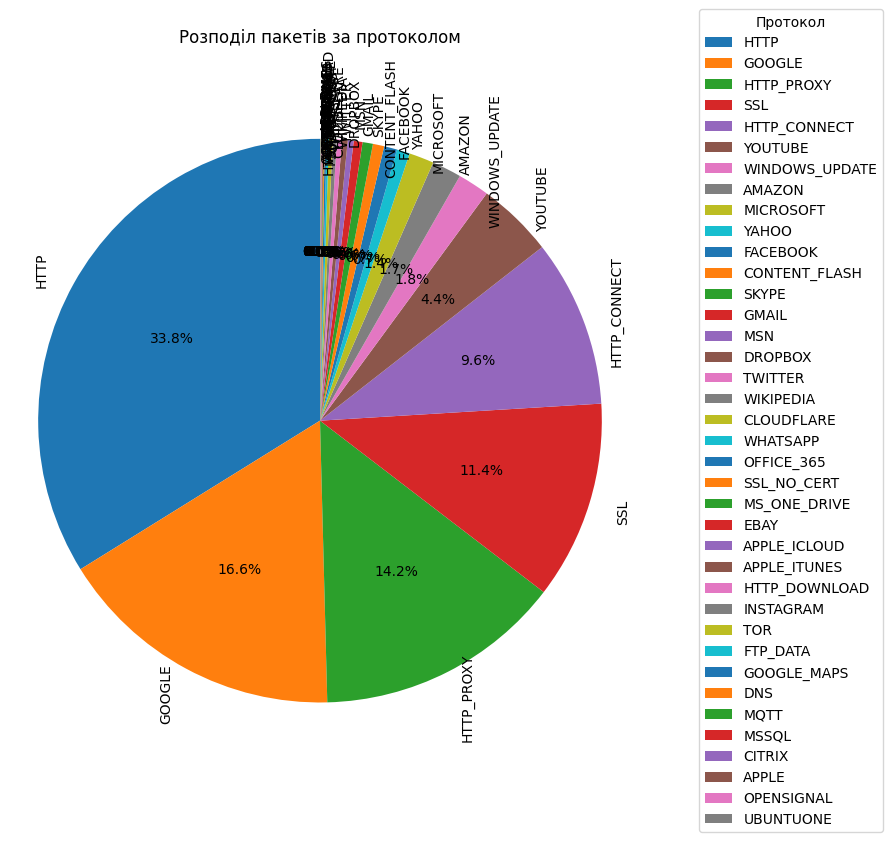

In [17]:
# Побудова кругової діаграми
protocol_counts = ds['ProtocolName'].value_counts()

plt.figure(figsize=(8, 8))
patches, texts, _ = plt.pie(protocol_counts, labels=protocol_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Розподіл пакетів за протоколом',y=1.1)
plt.axis('equal')

for text in texts:
    text.set_rotation(90)

# Винесення тексту в колонку біля графіка
plt.legend(title='Протокол', loc='center left', bbox_to_anchor=(1.1, 0.5))
plt.show()


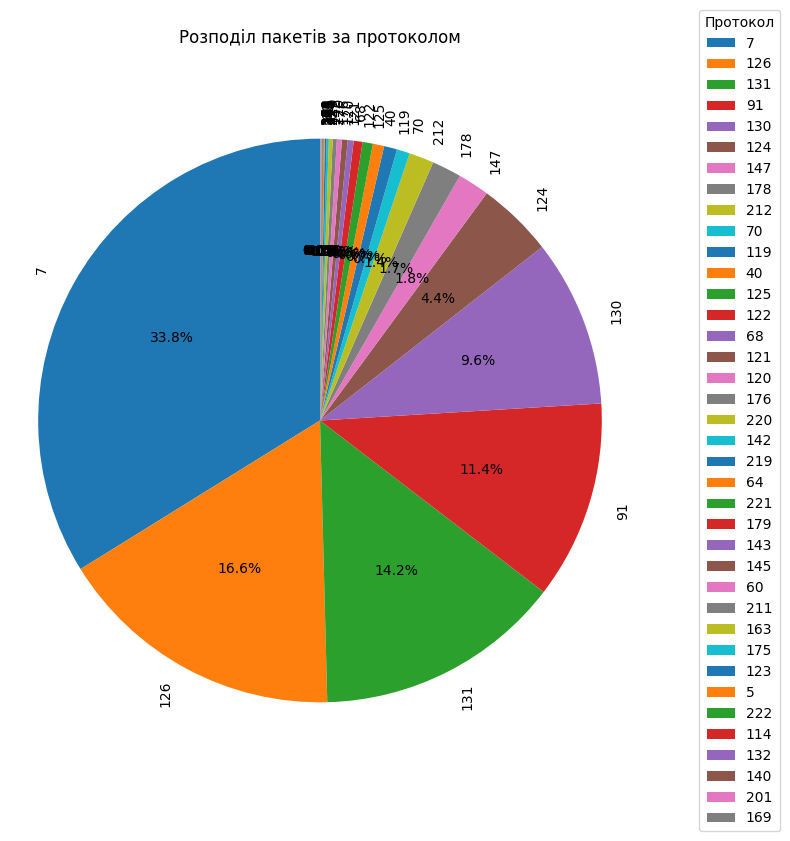

In [18]:
# Побудова кругової діаграми
l7protocol_counts = ds['L7Protocol'].value_counts()

plt.figure(figsize=(8, 8))
patches, texts, _ = plt.pie(l7protocol_counts, labels=l7protocol_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Розподіл пакетів за протоколом',y=1.1)
plt.axis('equal')

for text in texts:
    text.set_rotation(90)

# Винесення тексту в колонку біля графіка
plt.legend(title='Протокол', loc='center left', bbox_to_anchor=(1.1, 0.5))
plt.show()


In [19]:
from datetime import datetime

# Перетворення рядків на об'єкти datetime
ds['Timestamp'] = ds['Timestamp'].apply(lambda x: datetime.strptime(x, '%d/%m/%Y%H:%M:%S'))

# Отримання окремих стовпців з дати та часу
ds['Date'] = ds['Timestamp'].dt.date
ds['Hour'] = ds['Timestamp'].dt.time


In [20]:
df_cat=pd.DataFrame(columns=["Hour" ,"Date"])
df_cat["Hour"]=ds["Hour"]
df_cat["Date"]=ds["Date"]

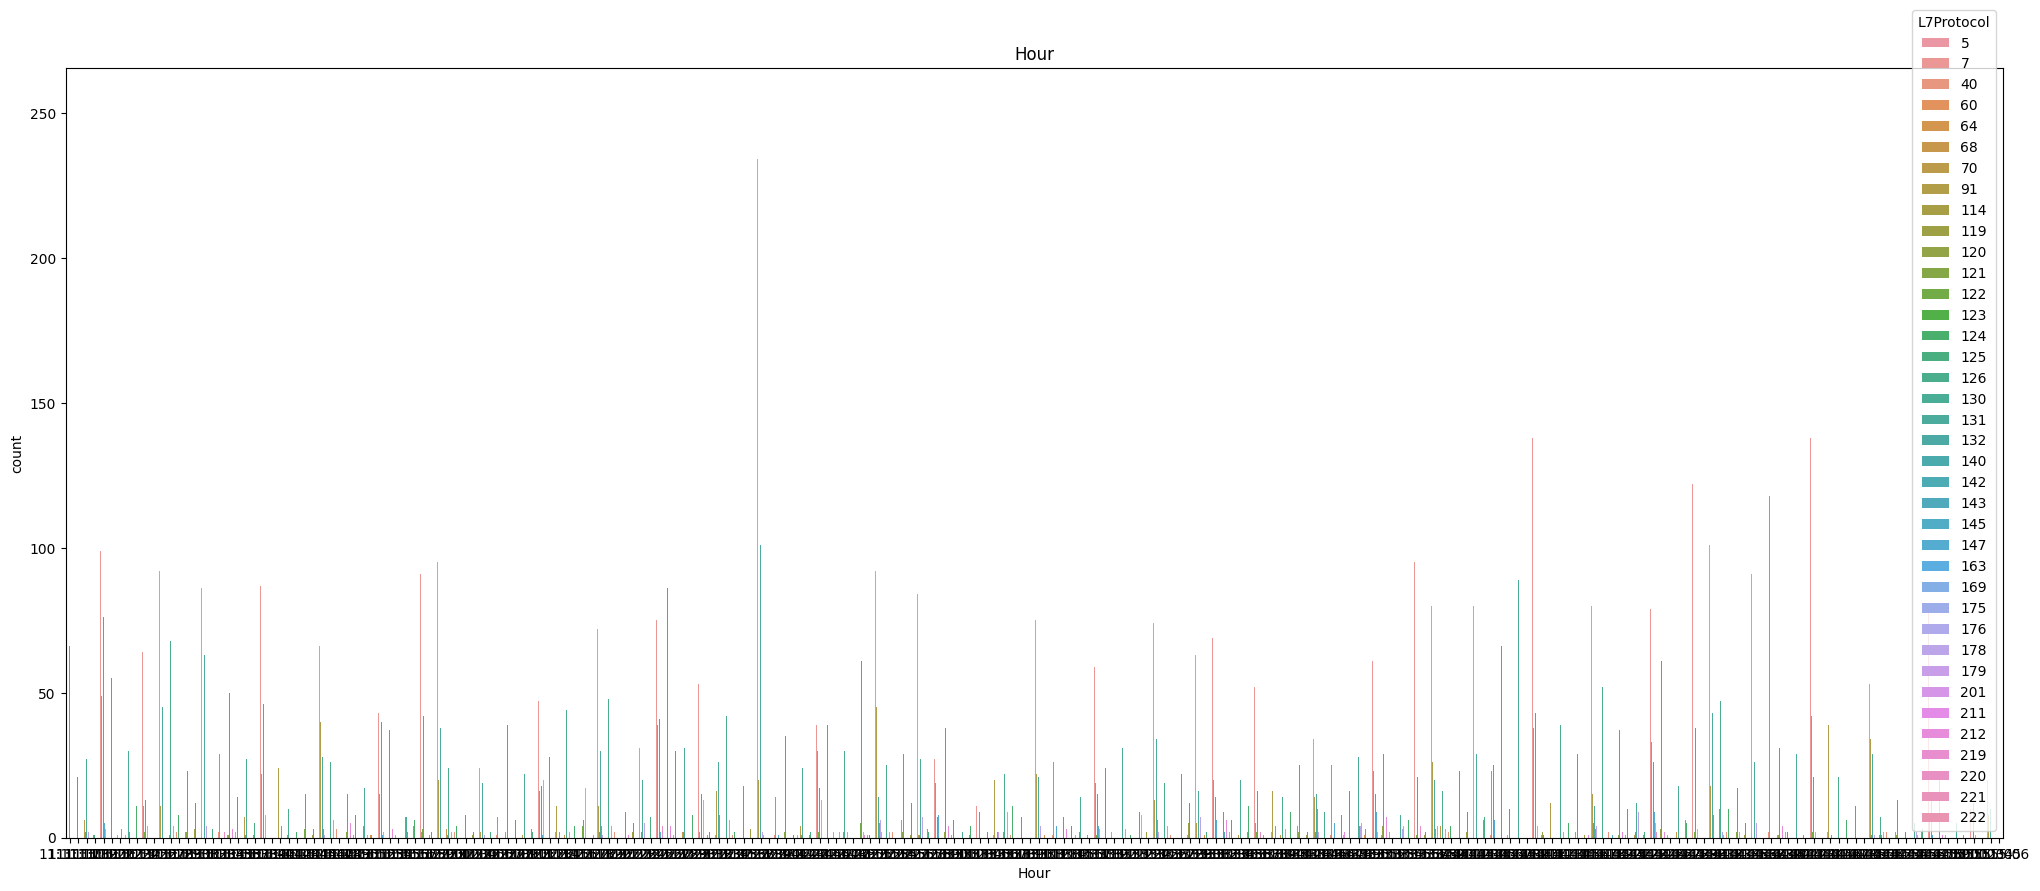

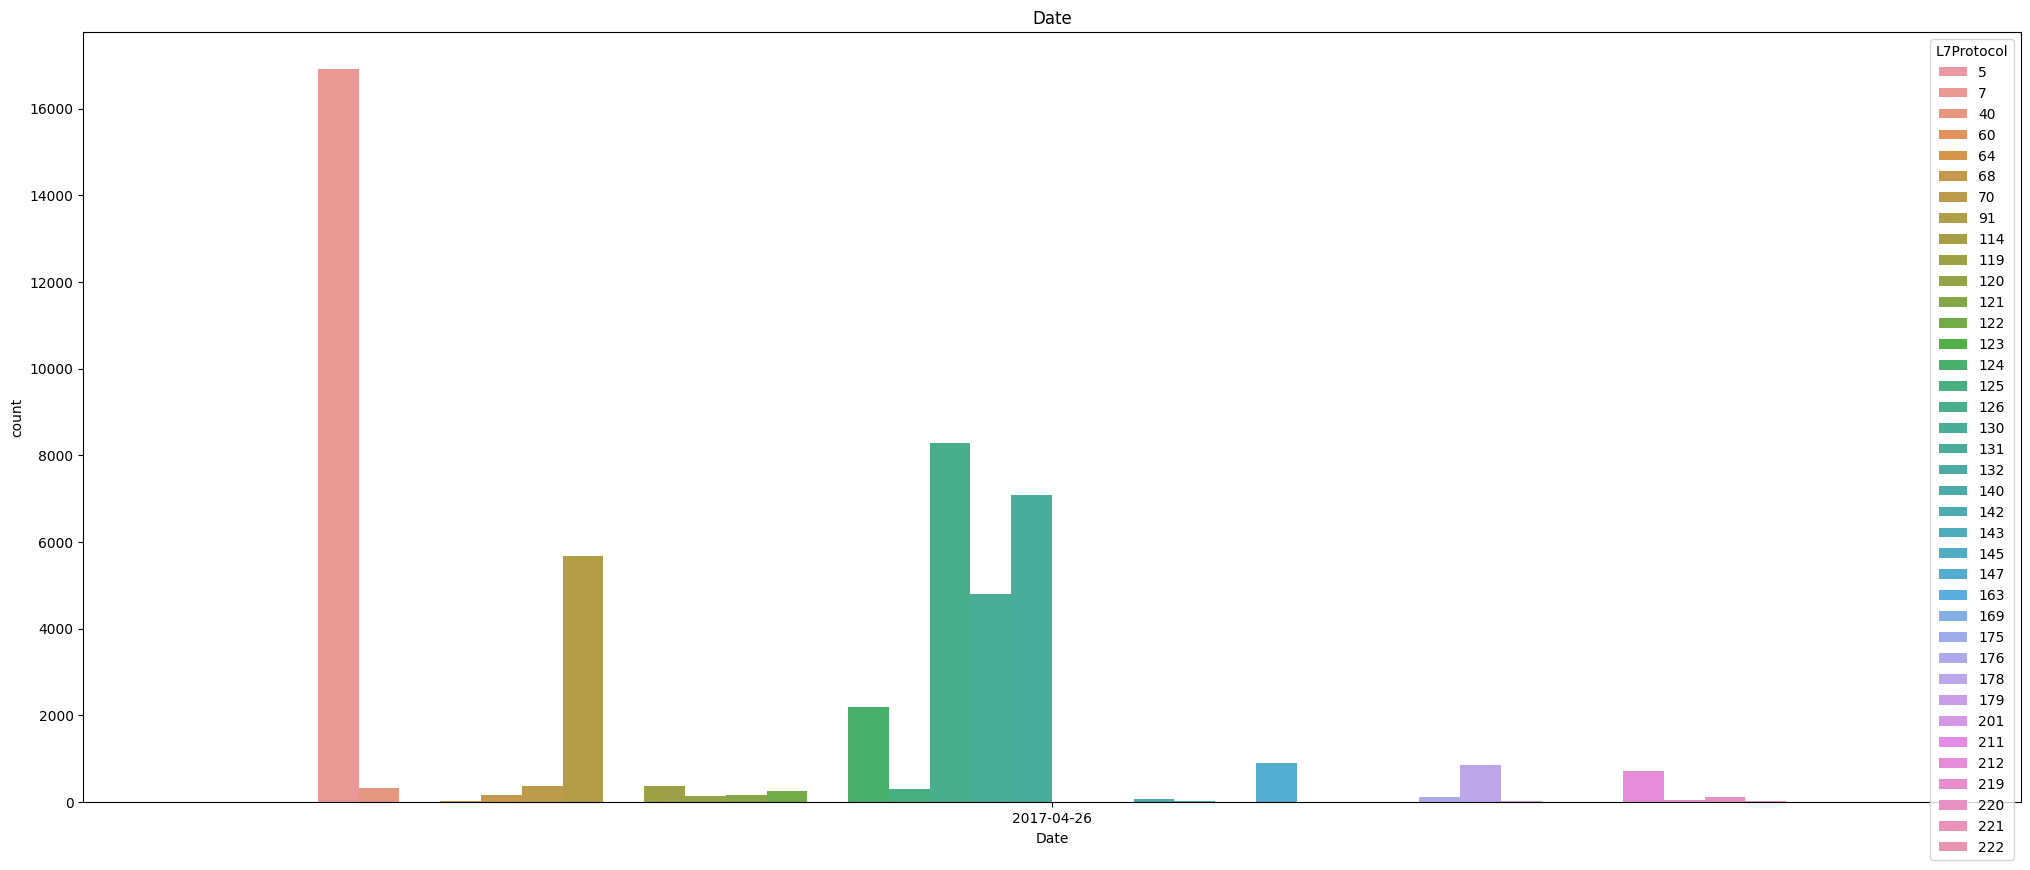

In [21]:
for i in df_cat.columns:
    plt.figure(figsize=(25,10))
    sns.countplot(data= df_cat, 
                  x= i,
                  hue=ds["L7Protocol"],
                  order = np.sort(df_cat[i].unique()))   
    plt.title(i)
    plt.show()

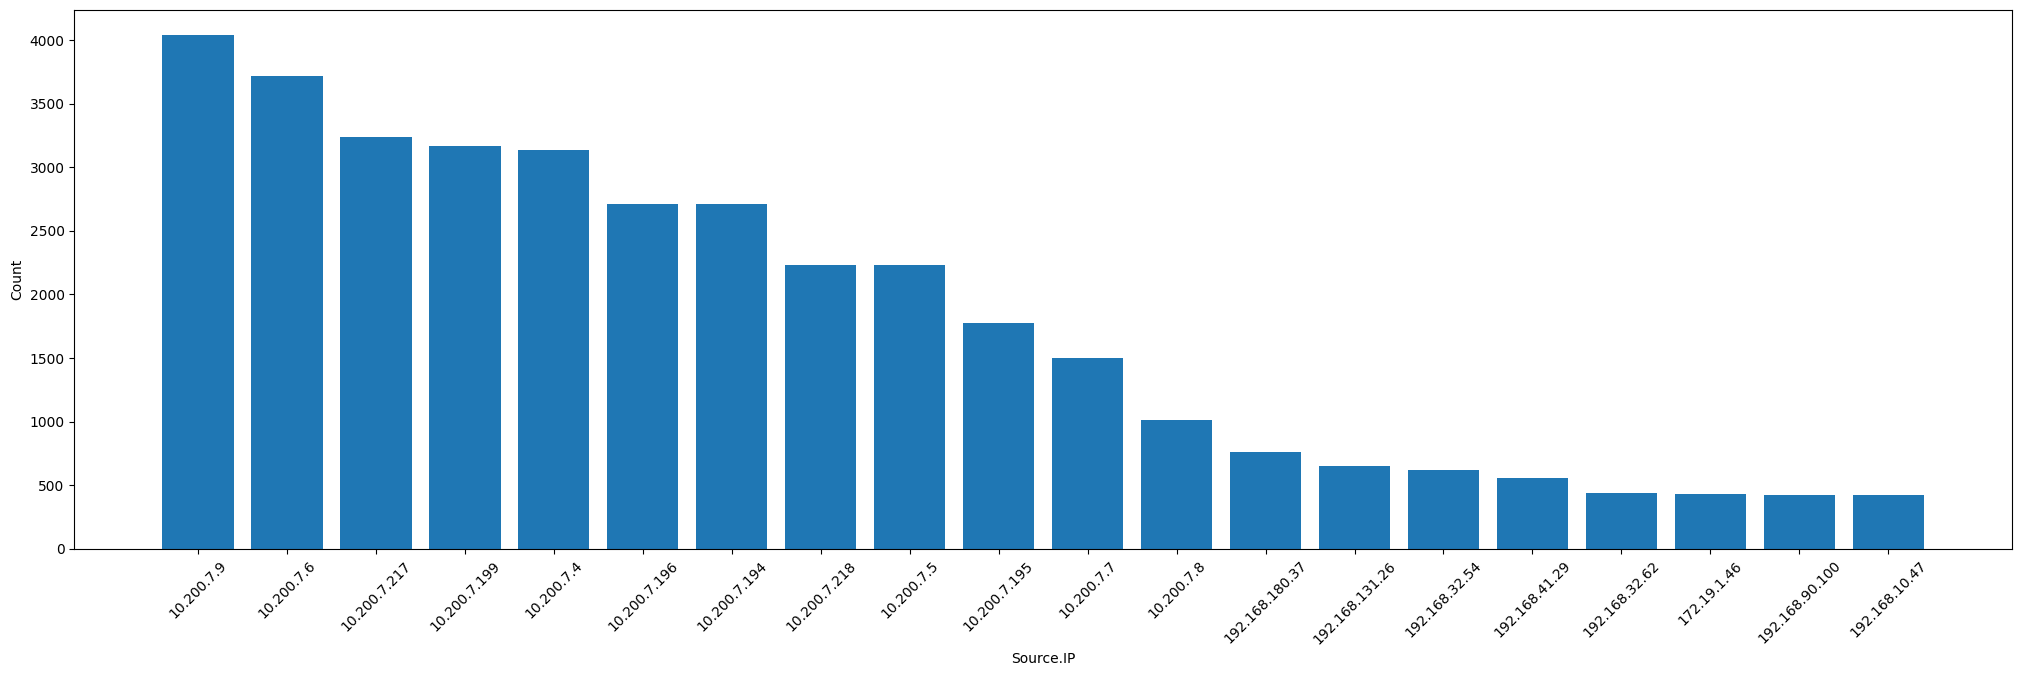

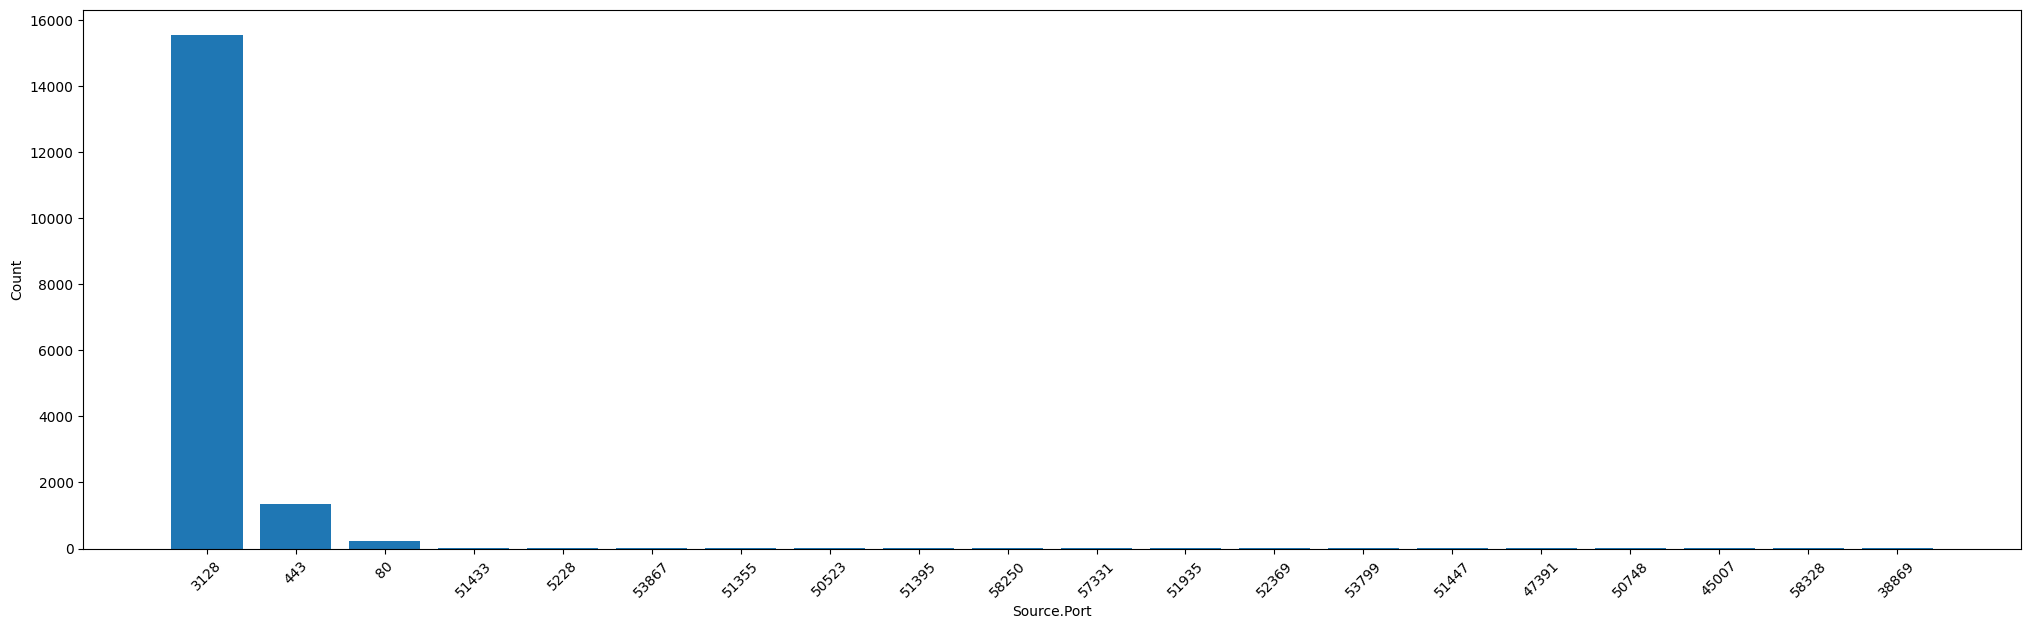

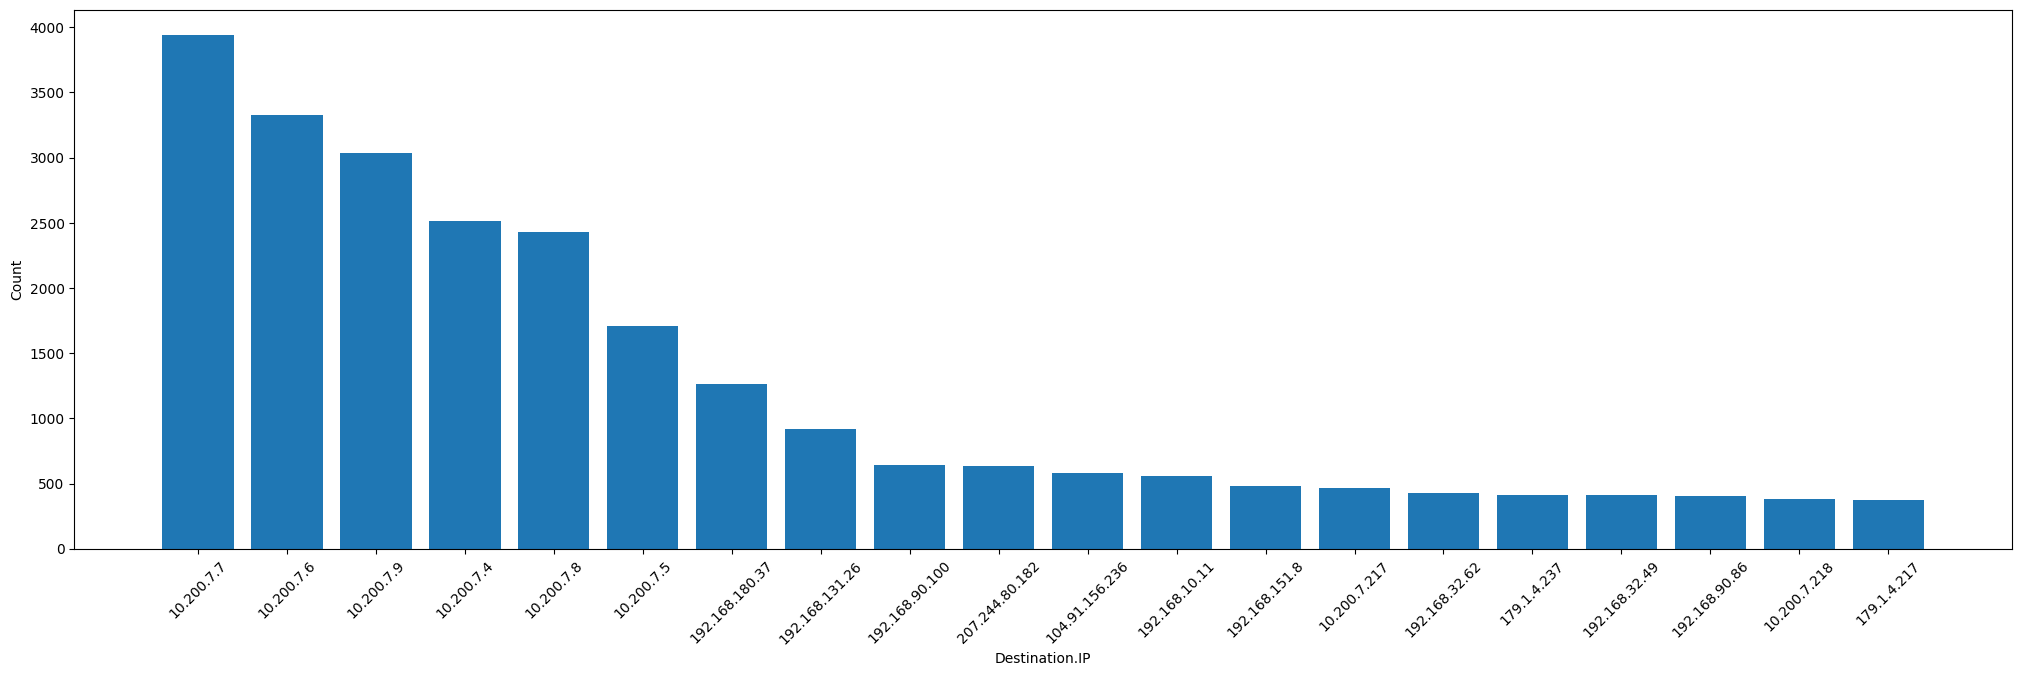

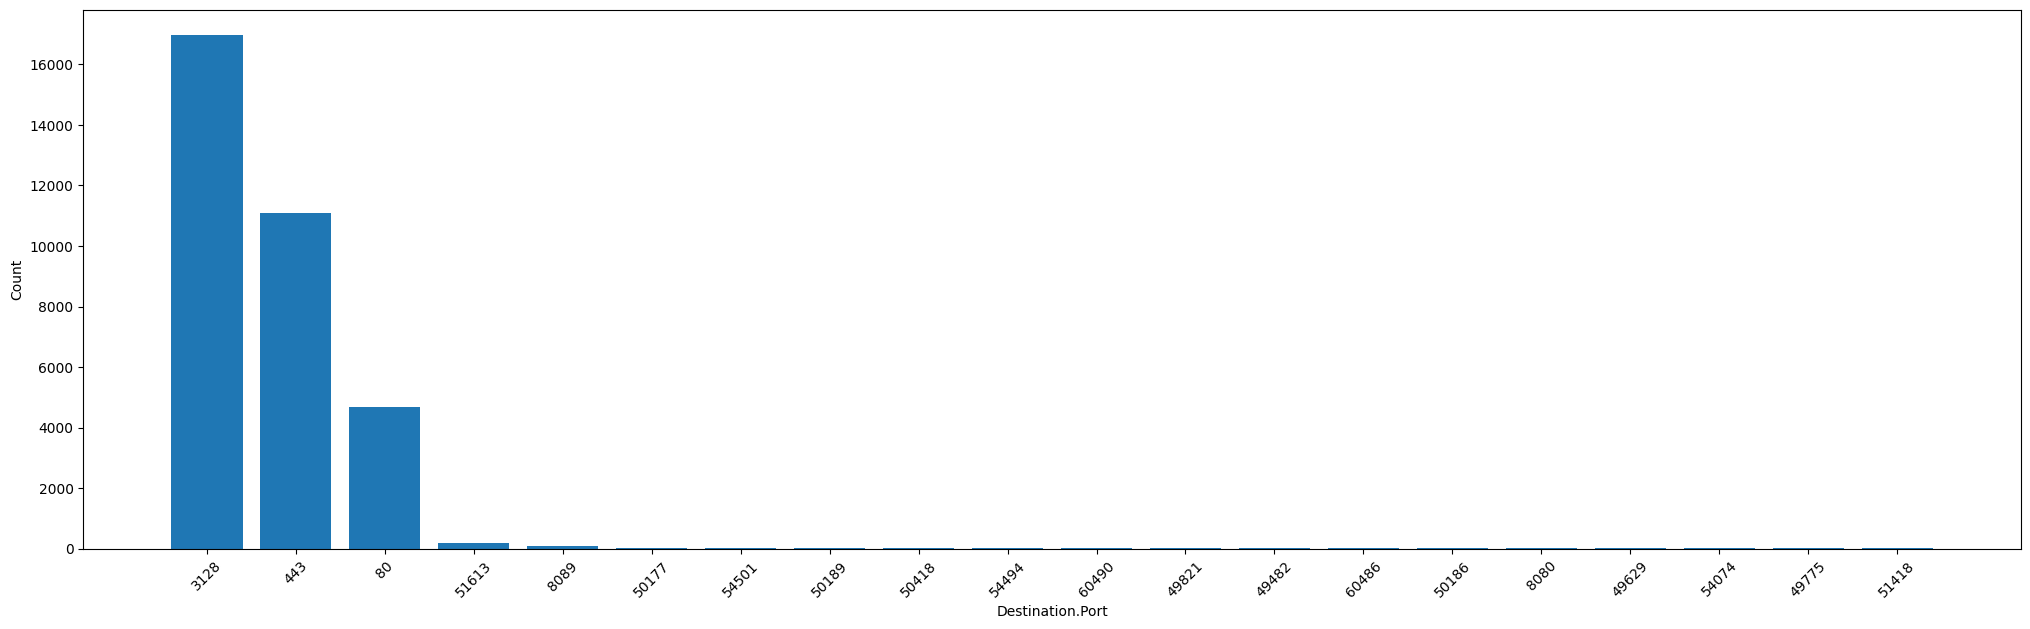

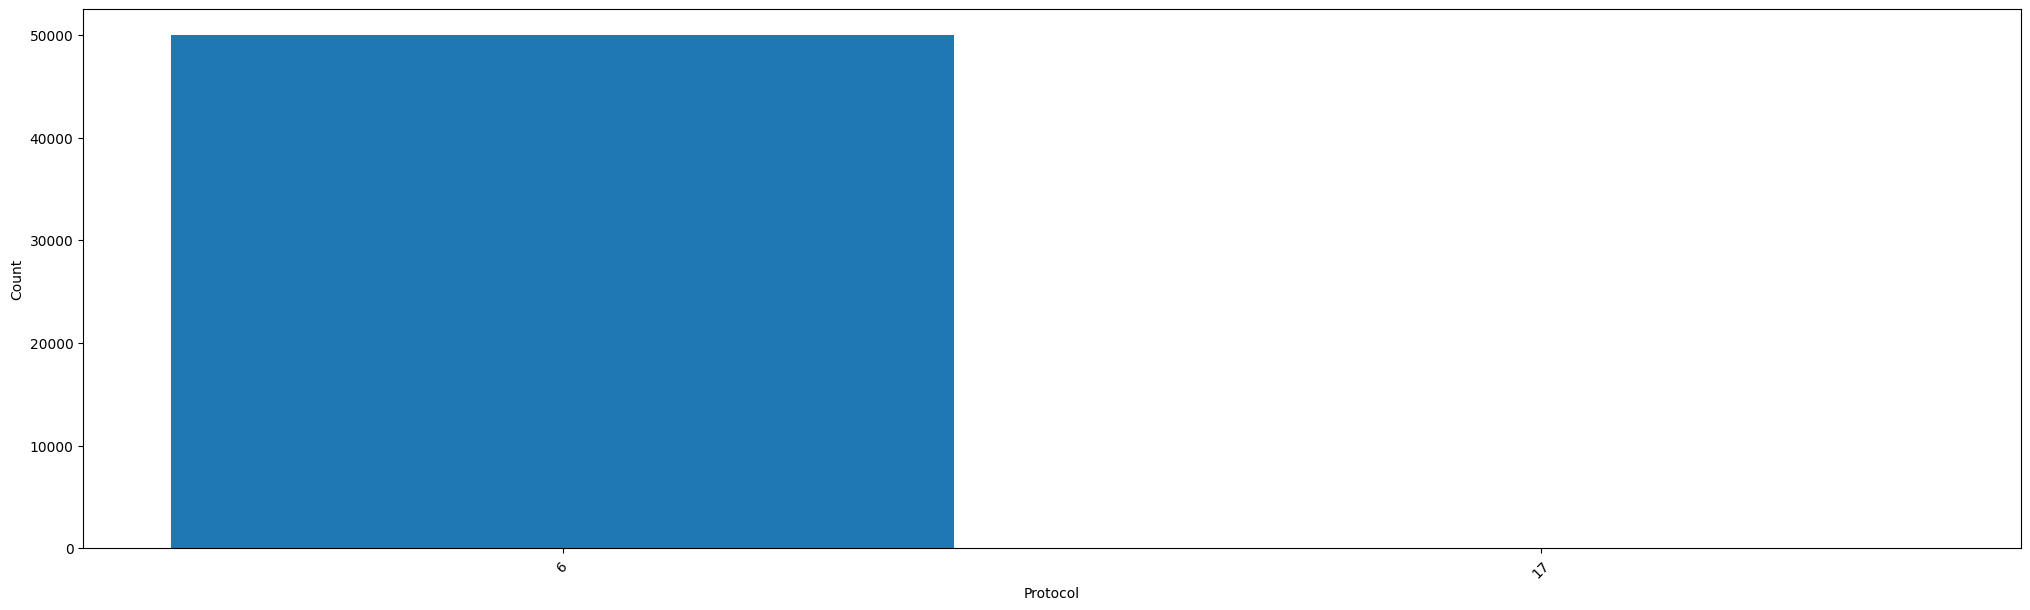

In [22]:
feature_name=["Source.IP","Source.Port", "Destination.IP", "Destination.Port","Protocol"]
for i in range(len(feature_name)):
    fig,ax = plt.subplots(figsize=(25,7))
    plt.bar(ds.groupby(feature_name[i])['L7Protocol'].count().sort_values(ascending=False).head(20).index.astype(str),
            ds.groupby(feature_name[i])['L7Protocol'].count().sort_values(ascending=False).head(20))
    plt.xticks(rotation=45)
    plt.ylabel('Count'), 
    plt.xlabel(feature_name[i])

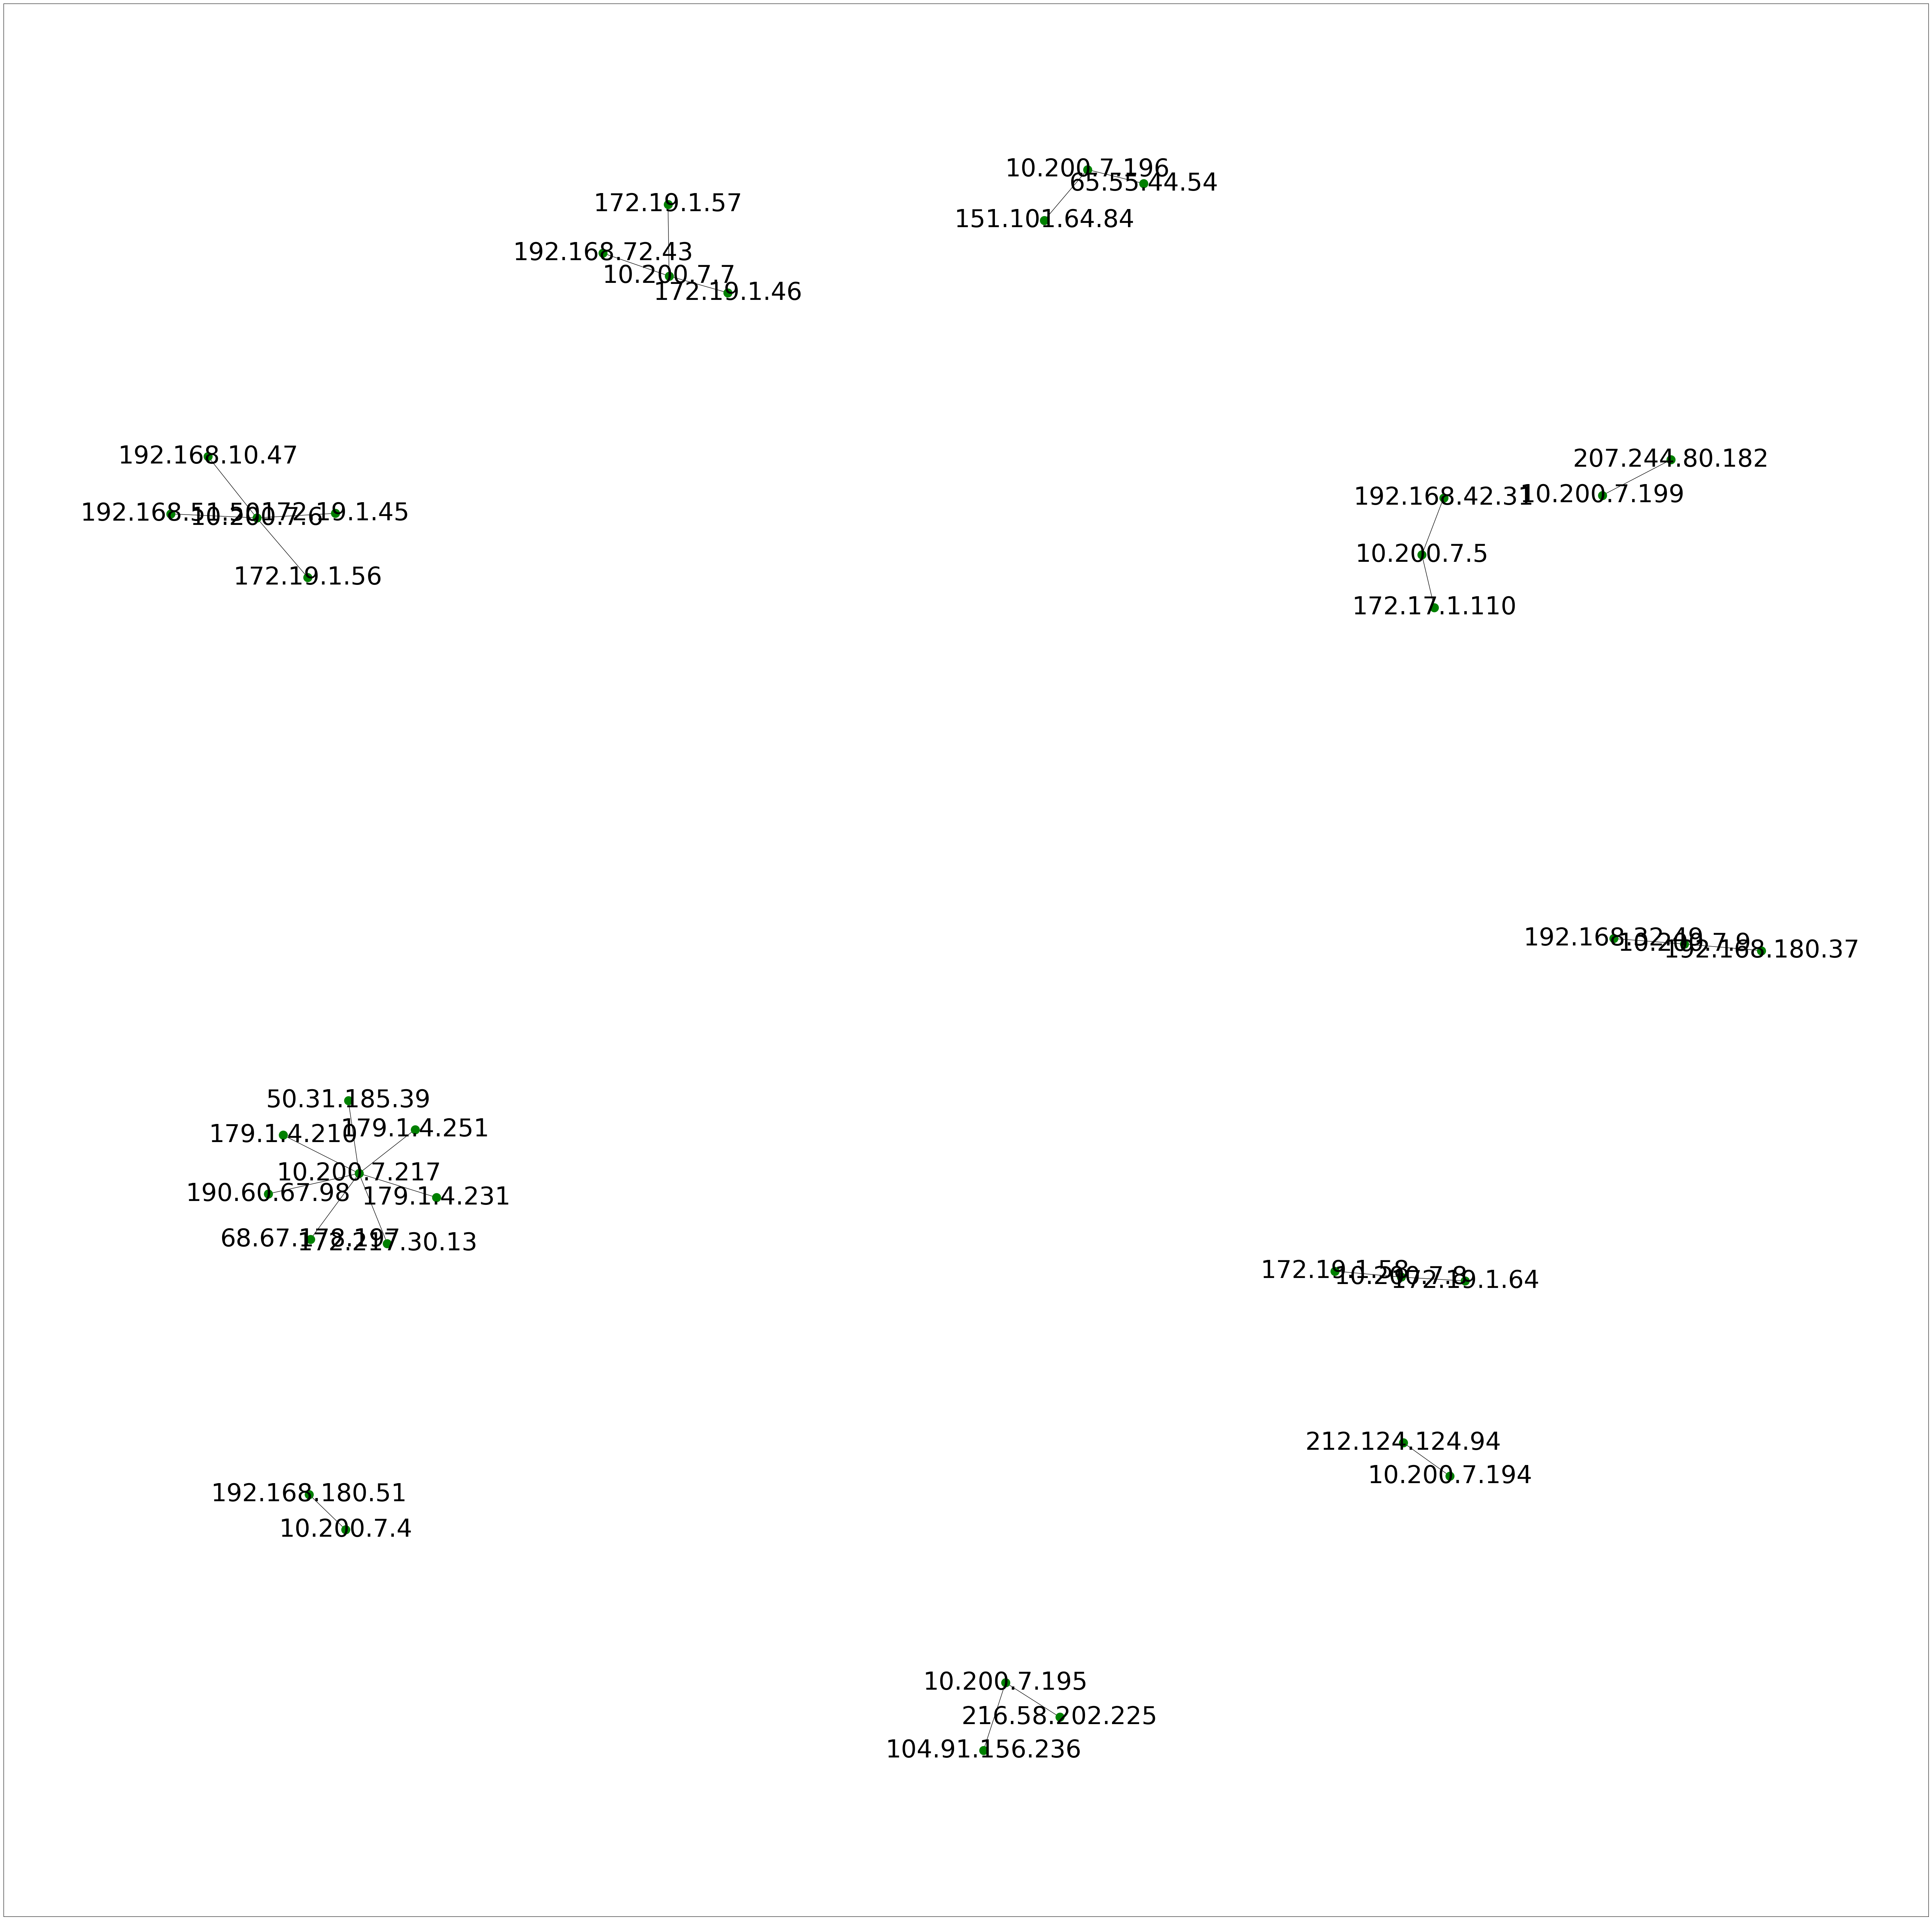

In [23]:
import networkx as nx

G = nx.Graph()

G = nx.from_pandas_edgelist(ds.head(100), 'Source.IP', 'Destination.IP')

plt.figure(figsize=(70, 70))
nx.draw_networkx(G, node_size=300,font_size=50,node_color="g")

In [24]:
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1)
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

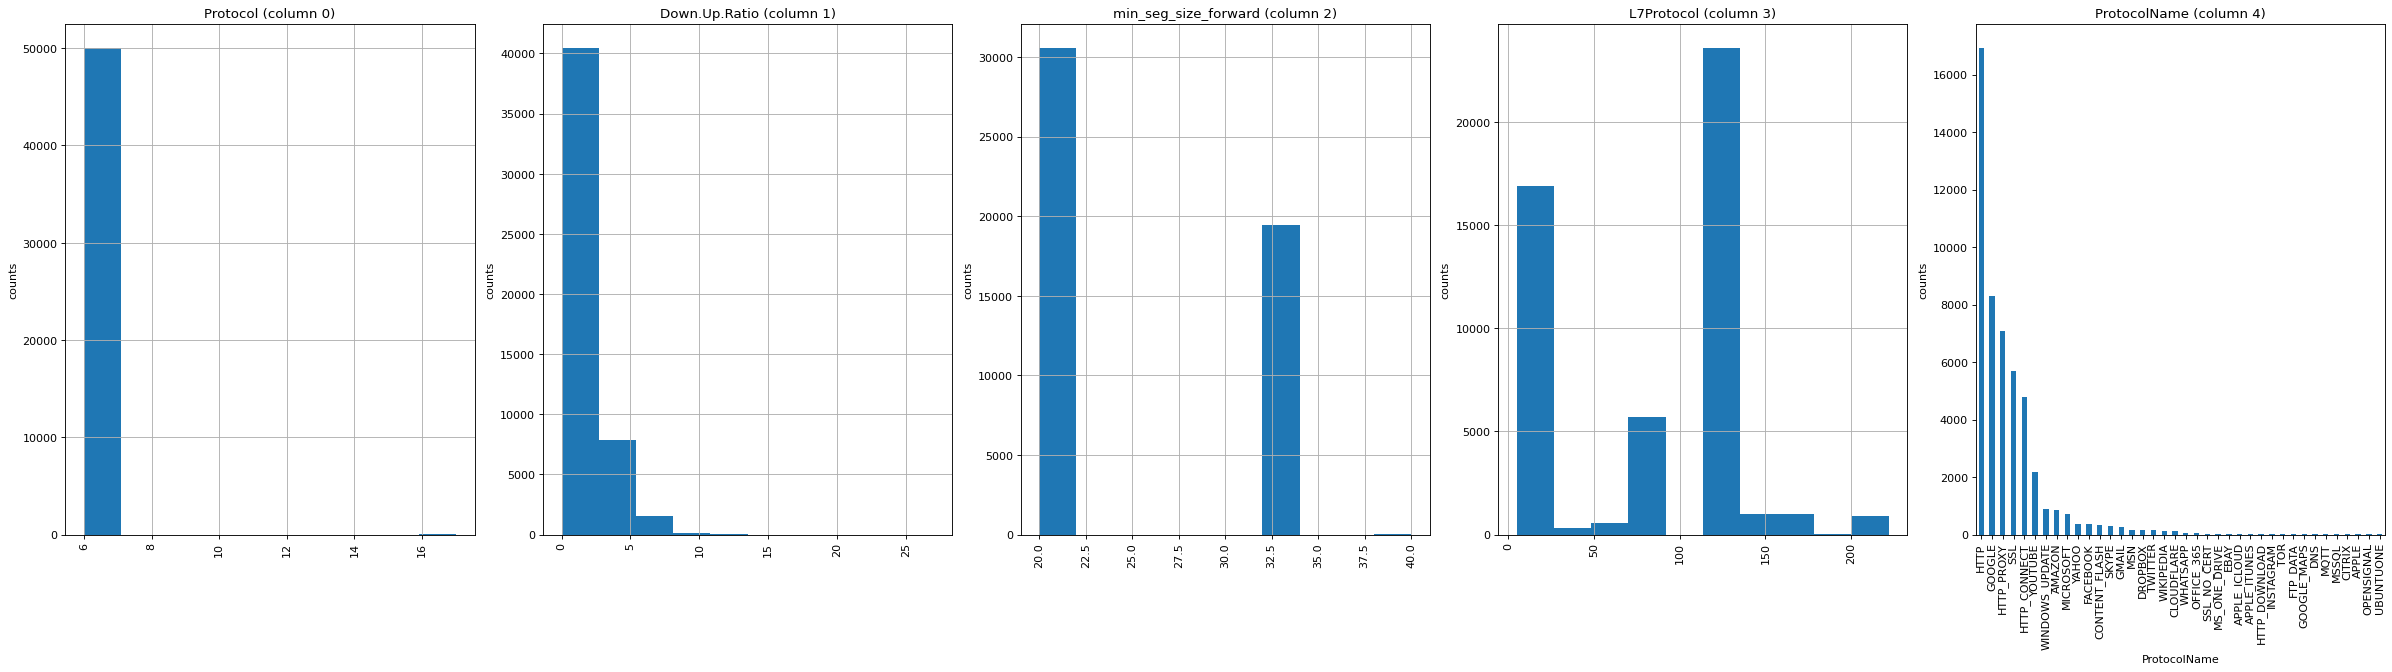

In [25]:
plotPerColumnDistribution(ds, 10, 5)

Text(0, 0.5, 'flowduration')

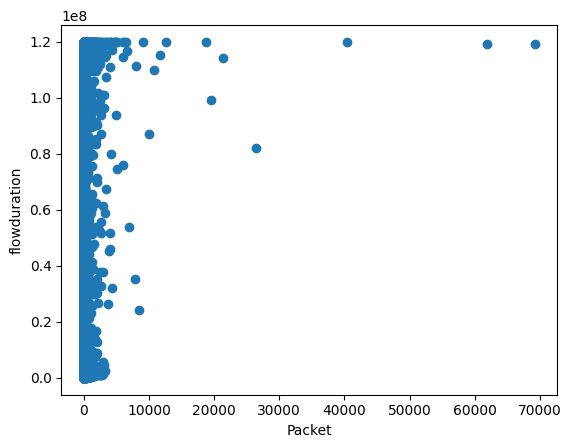

In [26]:
plt.scatter(ds['Total.Fwd.Packets'],ds['Flow.Duration'])
plt.xlabel('Packet')
plt.ylabel('flowduration')

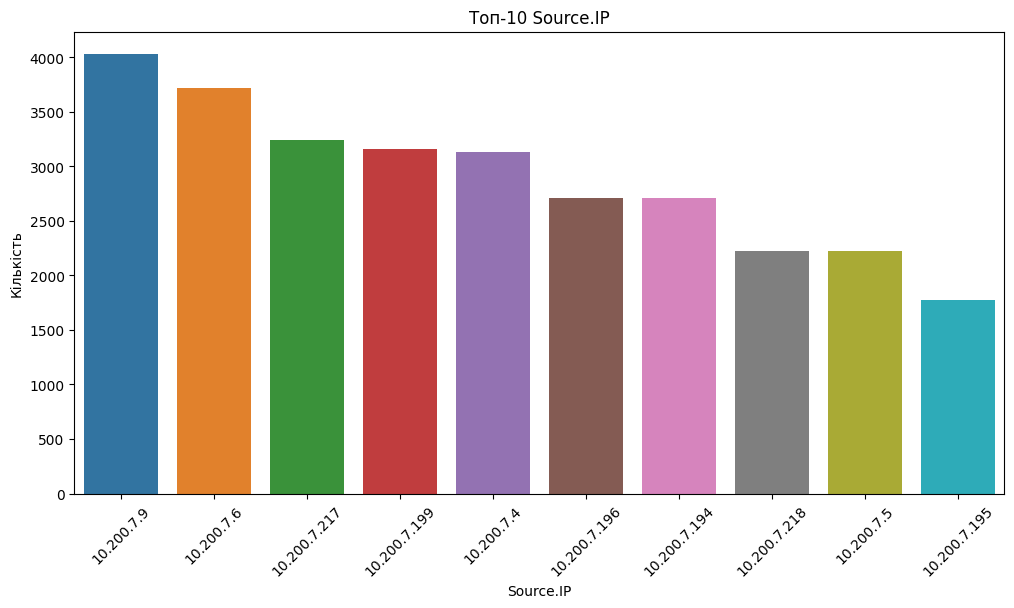

In [27]:
top_source_ips = ds['Source.IP'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_source_ips.index, y=top_source_ips.values)
plt.title('Топ-10 Source.IP')
plt.xlabel('Source.IP')
plt.ylabel('Кількість')
plt.xticks(rotation=45)
plt.show()

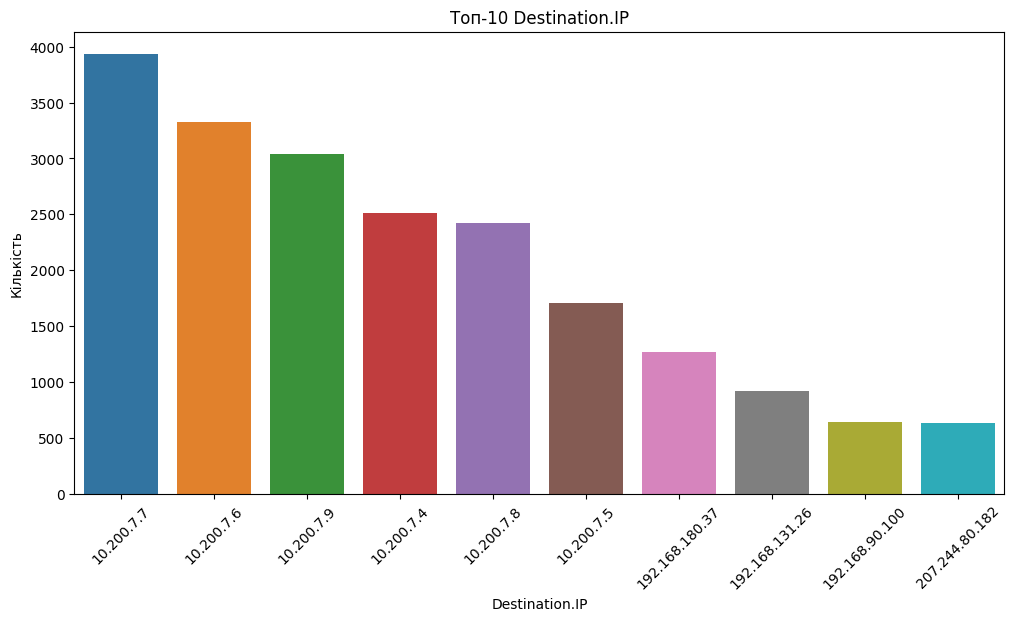

In [28]:
# Згрупування даних за Destination.IP та підрахунок кількості входжень
top_destination_ips = ds['Destination.IP'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_destination_ips.index, y=top_destination_ips.values)
plt.title('Топ-10 Destination.IP')
plt.xlabel('Destination.IP')
plt.ylabel('Кількість')
plt.xticks(rotation=45)
plt.show()


In [29]:
non_num_cols = [col for col in ds.columns if ds[col].dtype == 'O']
non_num_data = ds[non_num_cols]
num_cols = list(set(ds.columns) - set(non_num_cols))
cols_for_hist = [col for col in num_cols if ds[col].nunique() <= 50]
cols_for_hist, len(cols_for_hist)

(['Down.Up.Ratio', 'L7Protocol', 'min_seg_size_forward', 'Protocol'], 4)

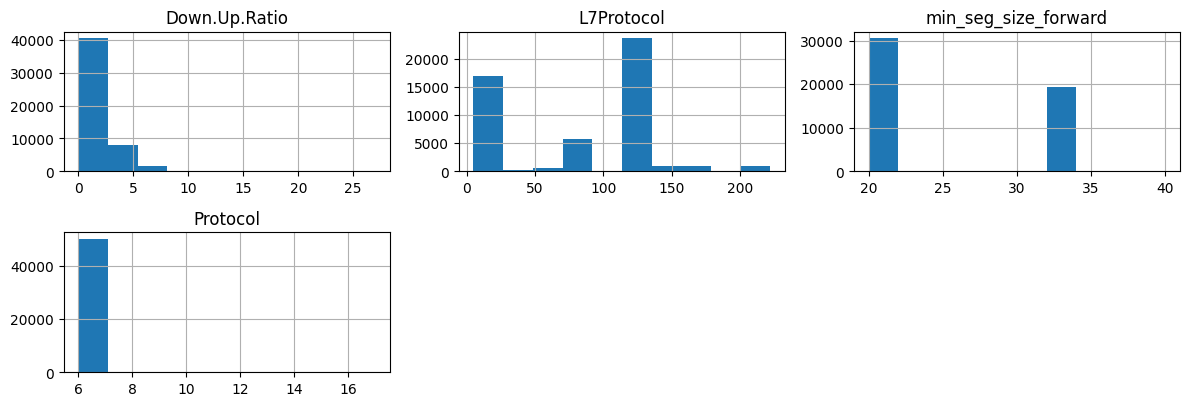

In [30]:
ds[cols_for_hist].hist(layout = (10,3), figsize = (12, 20))
plt.tight_layout()

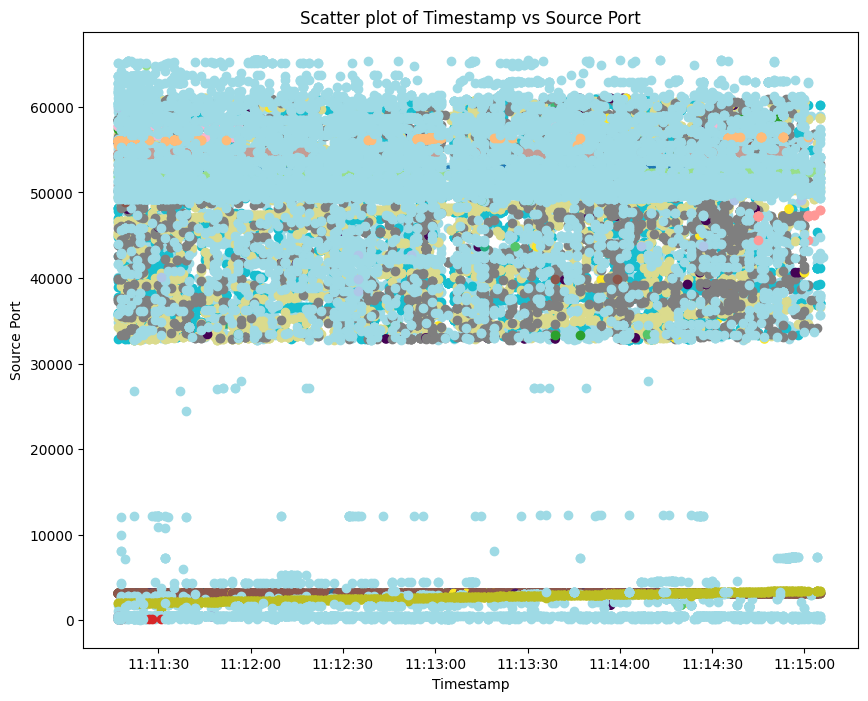

In [31]:
ip_addresses = pd.unique(ds[['Source.IP', 'Destination.IP']].values.ravel('K'))
ip_indices = pd.factorize(ip_addresses)[0]

# Додавання колонки з індексами у датафрейм
ds['ip_index'] = pd.factorize(ds['Source.IP'])[0]

# Побудова діаграми
fig, ax = plt.subplots(figsize=(10, 8))

colors = {ip_addresses[i]: plt.cm.tab20(i) for i in range(len(ip_addresses))}

for key, group in ds.groupby(['Source.IP', 'Source.Port', 'Destination.Port']):
    ip, source_port, dest_port = key
    color = colors[ip]
    ax.scatter(group['Timestamp'], group['Source.Port'], c=color)

ax.set_xlabel('Timestamp')
ax.set_ylabel('Source Port')
ax.set_title('Scatter plot of Timestamp vs Source Port')

plt.show()

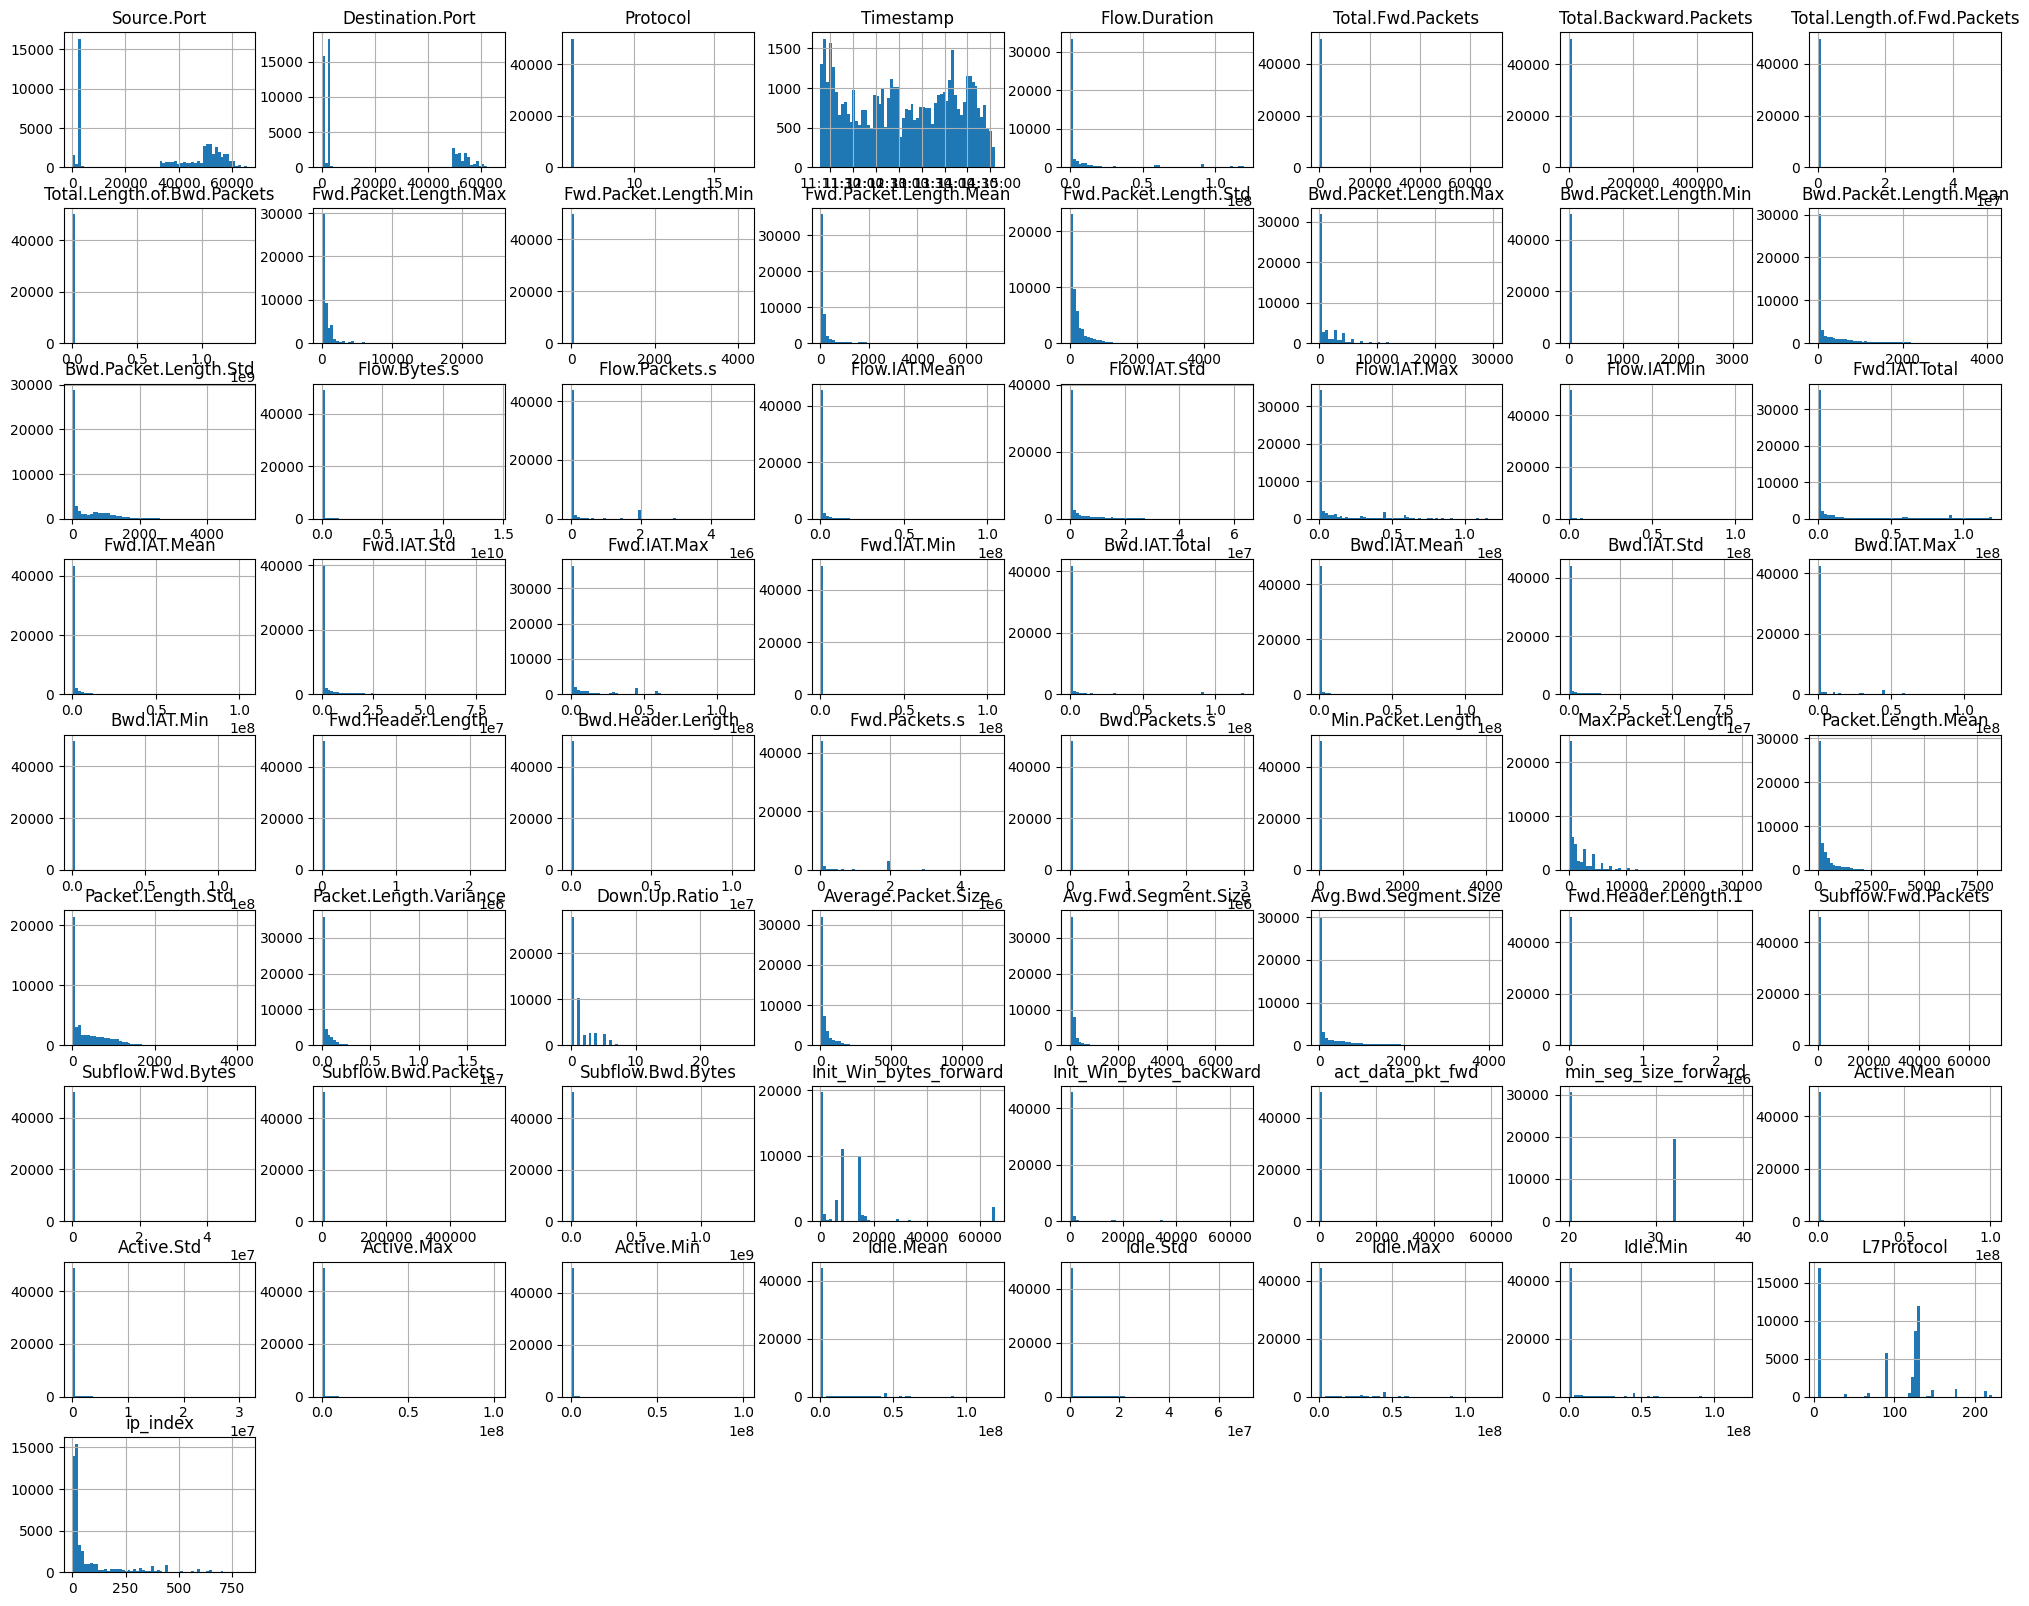

In [32]:
ds.hist(bins=60, figsize=(25,20))
plt.show()

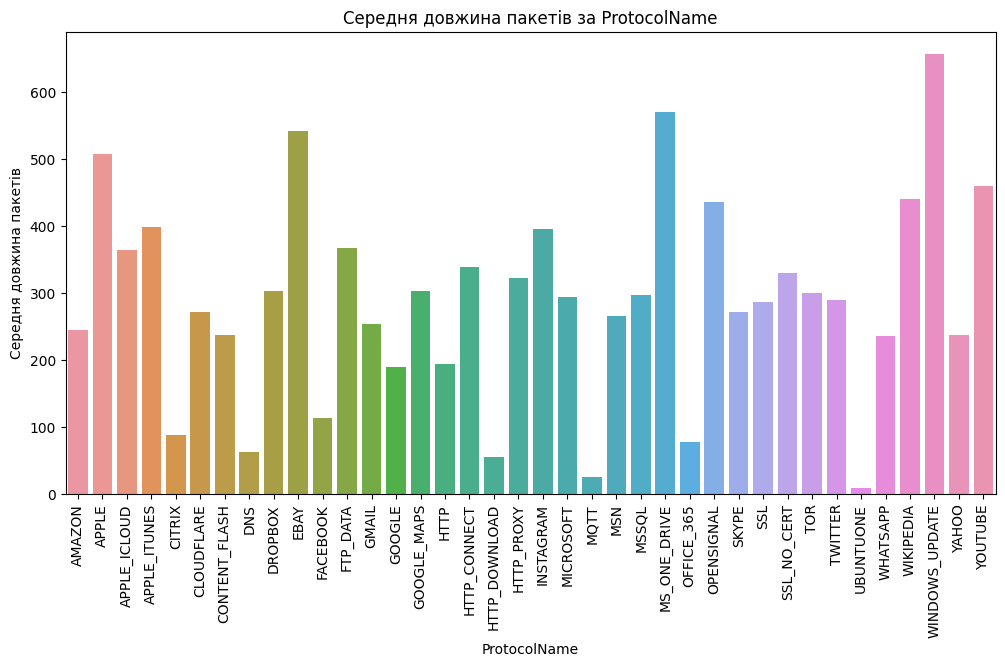

In [33]:
grouped_mean_length = ds.groupby('ProtocolName')['Packet.Length.Mean'].mean()

# Візуалізація середньої довжини пакетів за ProtocolName
plt.figure(figsize=(12, 6))
sns.barplot(x=grouped_mean_length.index, y=grouped_mean_length.values)
plt.title('Середня довжина пакетів за ProtocolName')
plt.xlabel('ProtocolName')
plt.ylabel('Середня довжина пакетів')
plt.xticks(rotation=90)
plt.show()

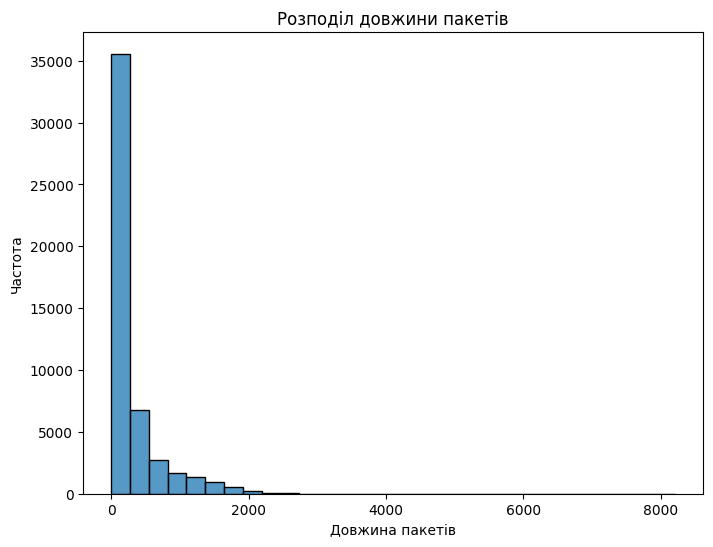

In [34]:
# Візуалізація розподілу довжини пакетів
plt.figure(figsize=(8, 6))
sns.histplot(data=ds, x='Packet.Length.Mean', bins=30)
plt.title('Розподіл довжини пакетів')
plt.xlabel('Довжина пакетів')
plt.ylabel('Частота')
plt.show()

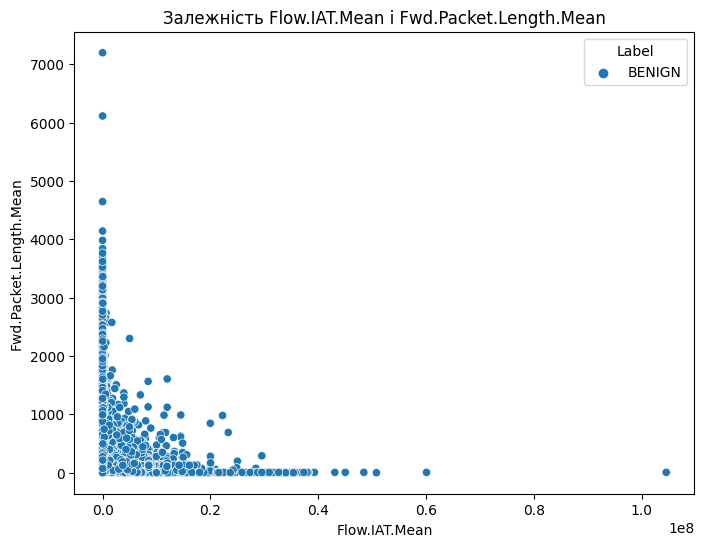

In [35]:
# Візуалізація взаємозв'язку між двома числовими змінними з розбивкою за Label
plt.figure(figsize=(8, 6))
sns.scatterplot(data=ds, x='Flow.IAT.Mean', y='Fwd.Packet.Length.Mean', hue='Label')
plt.title('Залежність Flow.IAT.Mean і Fwd.Packet.Length.Mean')
plt.xlabel('Flow.IAT.Mean')
plt.ylabel('Fwd.Packet.Length.Mean')
plt.legend(title='Label')
plt.show()

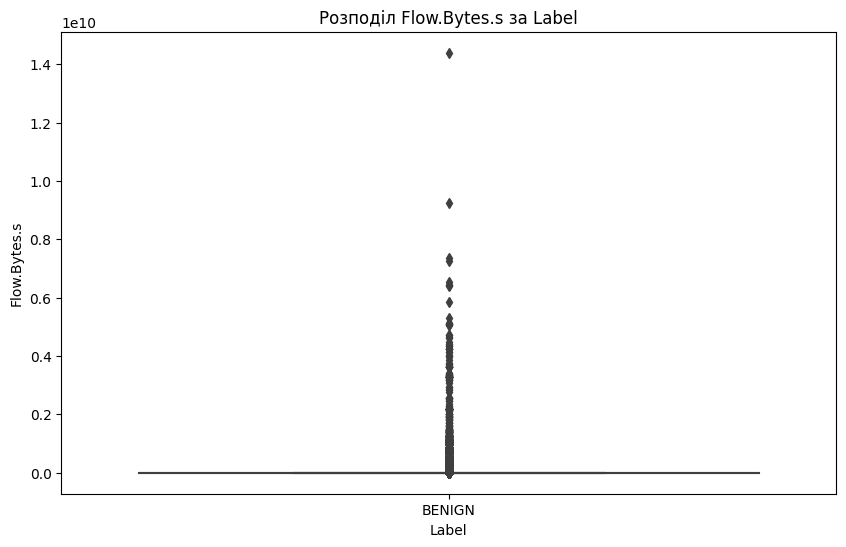

In [36]:
# Візуалізація взаємозв'язку між числовою змінною та категоріальною змінною
plt.figure(figsize=(10, 6))
sns.boxplot(data=ds, x='Label', y='Flow.Bytes.s')
plt.title('Розподіл Flow.Bytes.s за Label')
plt.xlabel('Label')
plt.ylabel('Flow.Bytes.s')
plt.show()

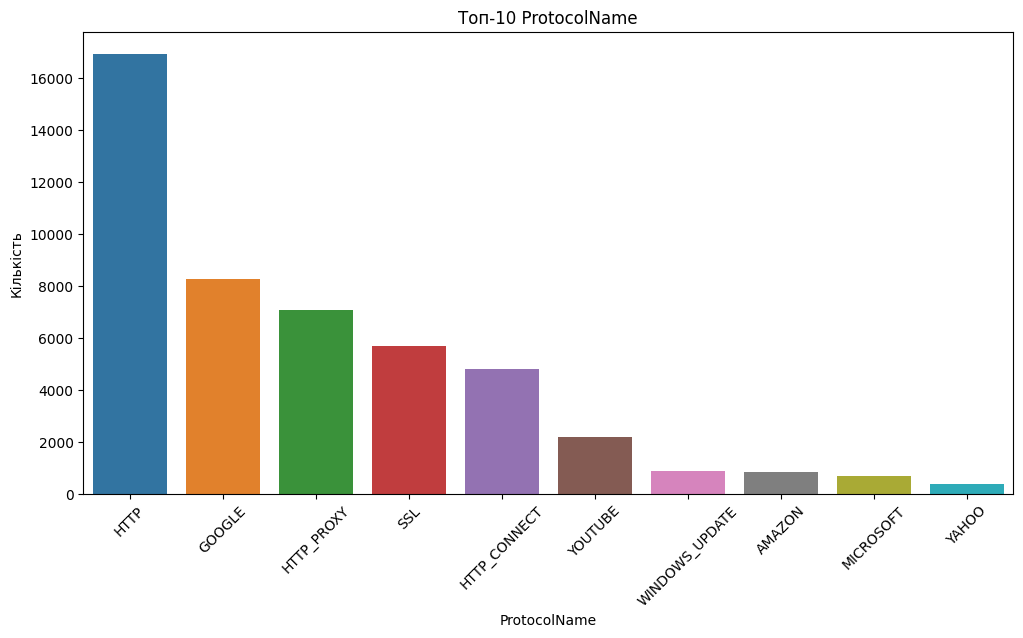

In [37]:
grouped_protocol_counts = ds['ProtocolName'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=grouped_protocol_counts.index, y=grouped_protocol_counts.values)
plt.title('Топ-10 ProtocolName')
plt.xlabel('ProtocolName')
plt.ylabel('Кількість')
plt.xticks(rotation=45)
plt.show()

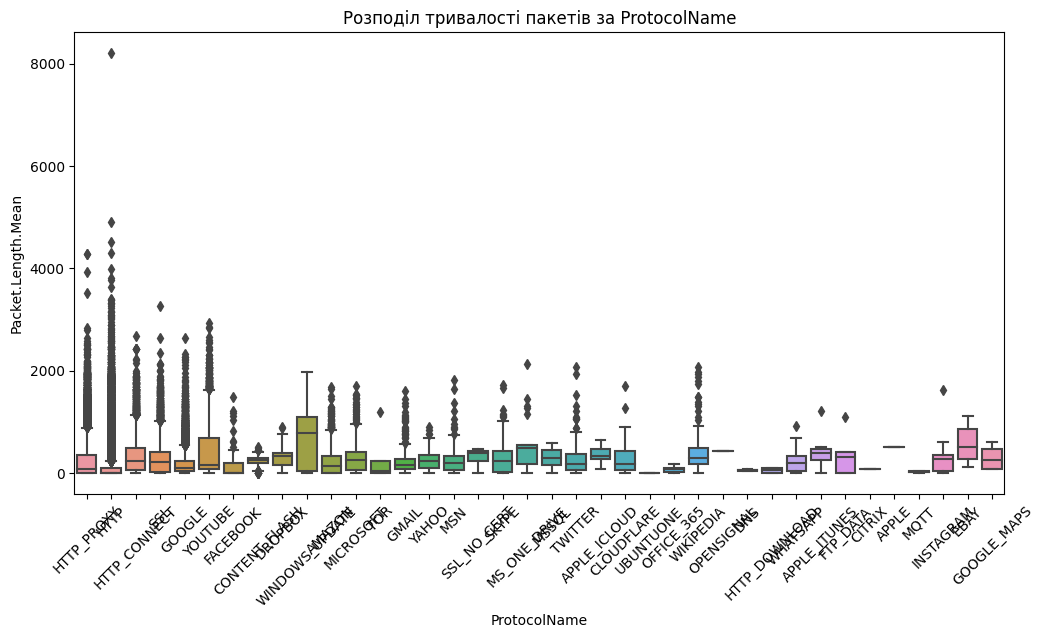

In [38]:
# Візуалізація розподілу тривалості пакетів за ProtocolName
plt.figure(figsize=(12, 6))
sns.boxplot(data=ds, x='ProtocolName', y='Packet.Length.Mean')
plt.title('Розподіл тривалості пакетів за ProtocolName')
plt.xlabel('ProtocolName')
plt.ylabel('Packet.Length.Mean')
plt.xticks(rotation=45)
plt.show()

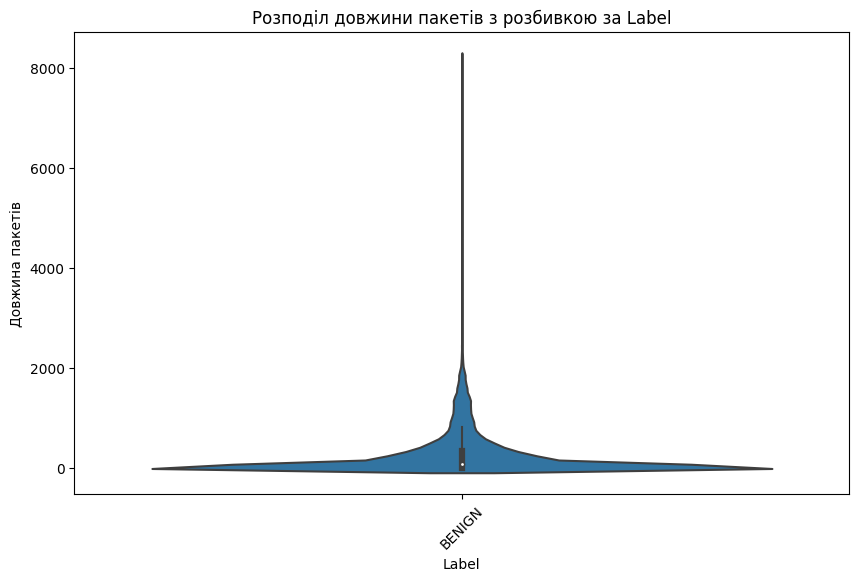

In [39]:
# Візуалізація розподілу довжини пакетів з розбивкою за Label
plt.figure(figsize=(10, 6))
sns.violinplot(data=ds, x='Label', y='Packet.Length.Mean')
plt.title('Розподіл довжини пакетів з розбивкою за Label')
plt.xlabel('Label')
plt.ylabel('Довжина пакетів')
plt.xticks(rotation=45)
plt.show()

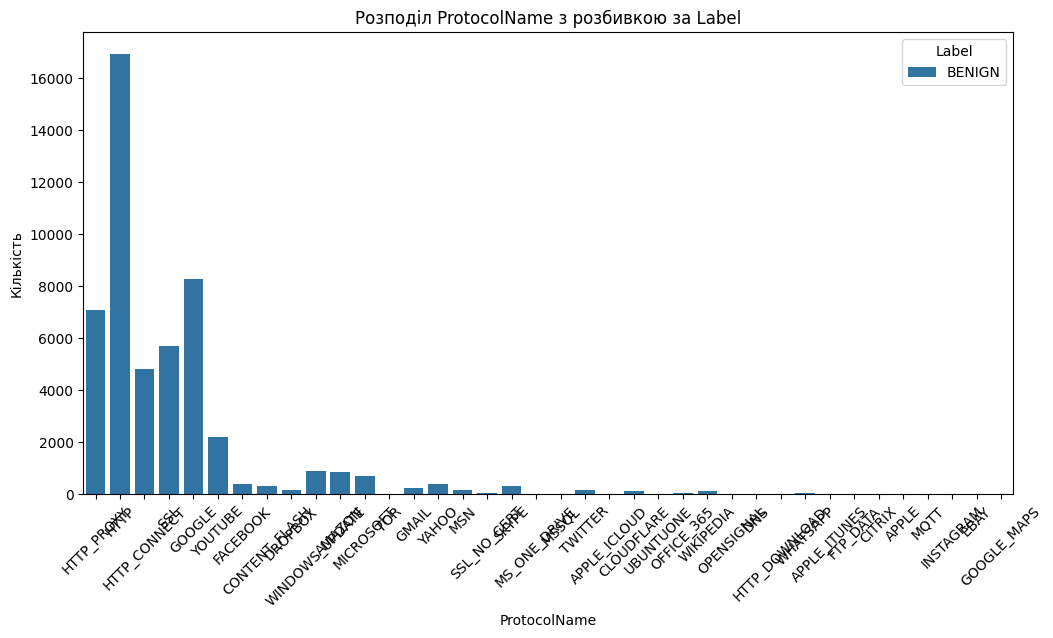

In [40]:
# Згрупування даних за ProtocolName та побудова графіка "countplot"
plt.figure(figsize=(12, 6))
sns.countplot(data=ds, x='ProtocolName', hue='Label')
plt.title('Розподіл ProtocolName з розбивкою за Label')
plt.xlabel('ProtocolName')
plt.ylabel('Кількість')
plt.xticks(rotation=45)
plt.legend(title='Label')
plt.show()

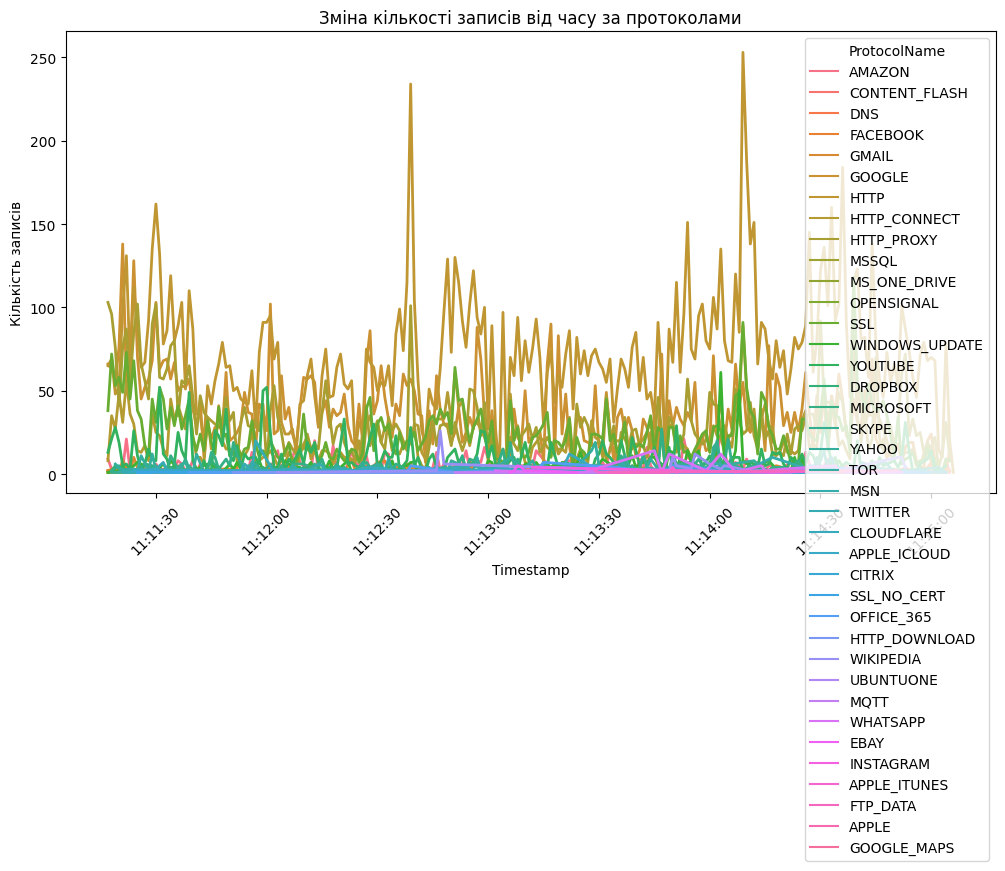

In [41]:
# Згрупування даних за Timestamp та ProtocolName та підрахунок кількості записів
grouped_data = ds.groupby(['Timestamp', 'ProtocolName']).size().reset_index(name='Count')

plt.figure(figsize=(12, 6))
sns.lineplot(data=grouped_data, x='Timestamp', y='Count', hue='ProtocolName', linewidth=2)
plt.title('Зміна кількості записів від часу за протоколами')
plt.xlabel('Timestamp')
plt.ylabel('Кількість записів')
plt.xticks(rotation=45)
plt.legend(title='ProtocolName')
plt.show()


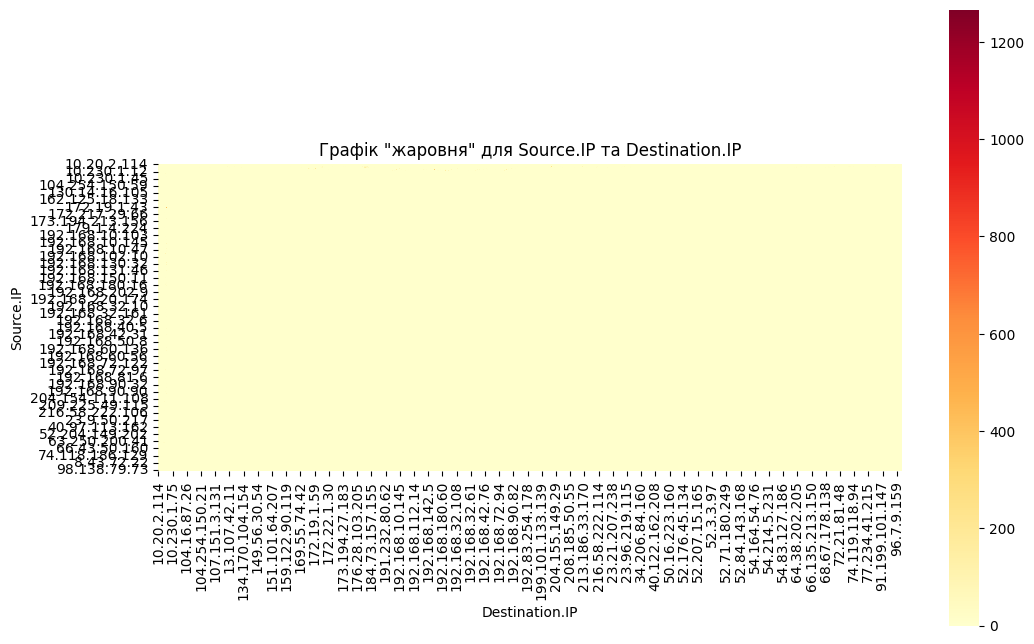

In [42]:
# Підрахунок кількості входжень для кожної комбінації Source.IP і Destination.IP
ip_counts = ds.groupby(['Source.IP', 'Destination.IP']).size().reset_index(name='Count')

# Перетворення даних у вигляд, зручний для побудови "жаровні"
heatmap_data = ip_counts.pivot_table(index='Source.IP', columns='Destination.IP', values='Count', fill_value=0)

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='YlOrRd', square=True, cbar=True)
plt.title('Графік "жаровня" для Source.IP та Destination.IP')
plt.xlabel('Destination.IP')
plt.ylabel('Source.IP')
plt.show()


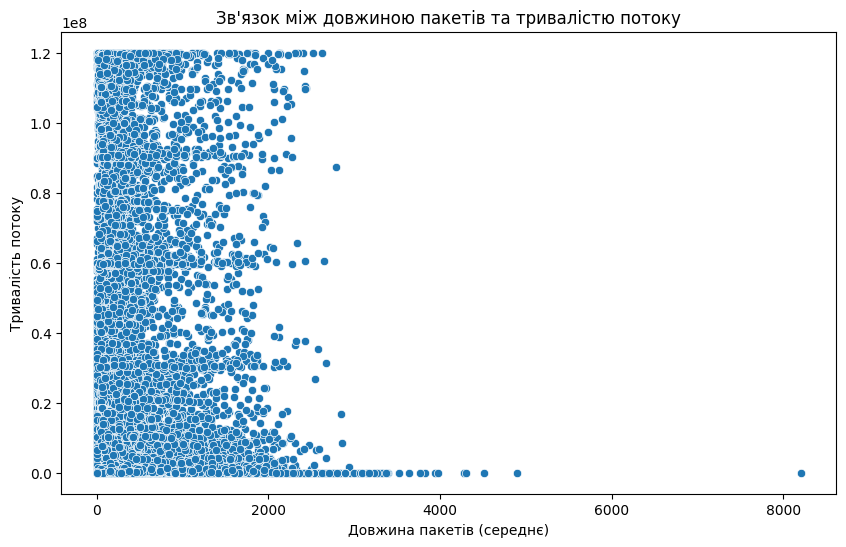

In [43]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=ds, x='Packet.Length.Mean', y='Flow.Duration')
plt.title('Зв\'язок між довжиною пакетів та тривалістю потоку')
plt.xlabel('Довжина пакетів (середнє)')
plt.ylabel('Тривалість потоку')
plt.show()


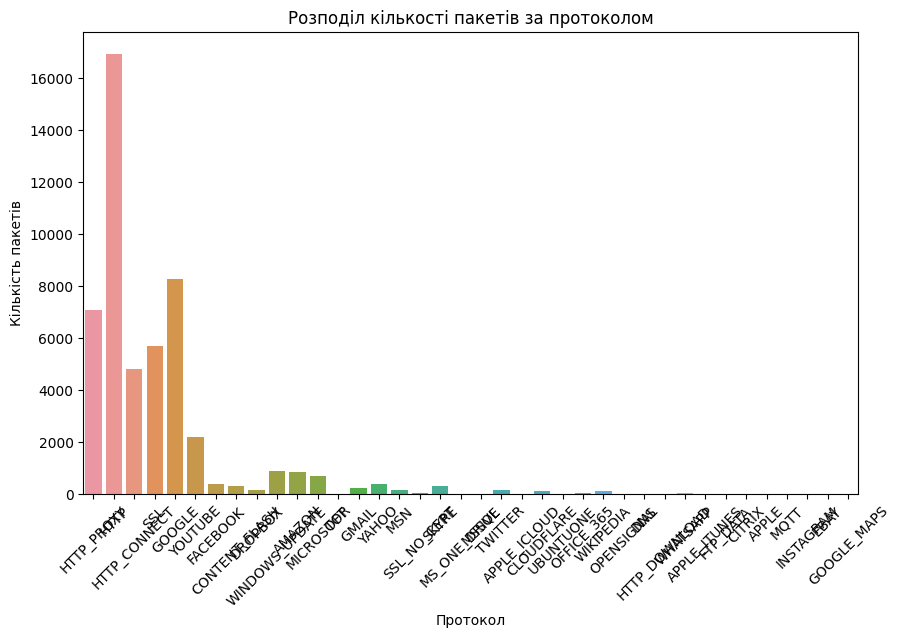

In [44]:
plt.figure(figsize=(10, 6))
sns.countplot(data=ds, x='ProtocolName')
plt.title('Розподіл кількості пакетів за протоколом')
plt.xlabel('Протокол')
plt.ylabel('Кількість пакетів')
plt.xticks(rotation=45)
plt.show()
